In [1]:
import pandas as pd
import matplotlib as plt
%matplotlib inline
import matplotlib.pyplot as plt
from sklearn.base import BaseEstimator, RegressorMixin, TransformerMixin
from sklearn.pipeline import Pipeline
from sklearn.pipeline import make_pipeline
import numpy as np

In [2]:
#copy data from hdsf to local a local folder. 
#The below command copies the entire files of 2017-04-07 from hdfs to a local file named 2017-04-07.json
#ssh 5gem@storklustret-admin.rnd.ki.sw.ericsson.se "hdfs dfs -cat /user/5gem/2017-04-07/*.json" > 2017-04-07.json
# read the entire file into a python array
# 1million records
with open('2017-04-07/2017-04-07.json', 'rb') as f:
    data = f.readlines()

# remove the trailing "\n" from each line
data = map(lambda x: x.rstrip(), data)

# each element of 'data' is an individual JSON object.
# To convert it into an *array* of JSON objects add square brackets to the beginning
# and end, and have all the individual business JSON objects
# separated by a comma
data_json_str = "[" + ','.join(data) + "]"

# now, load it into pandas
df = pd.read_json(data_json_str)

df.count()

@timestamp    1017486
@version      1017486
calvints      1017486
id            1017486
info          1017486
serverts      1017486
sourcets      1017486
status        1017486
tag           1017486
type          1017486
value         1017486
dtype: int64

In [3]:
df.tail(20)

,@timestamp,@version,calvints,id,info,serverts,sourcets,status,tag,type,value
1017466,2017-04-07T23:59:57.744Z,1,1491609597178,ns=2;s=/Nck/Spindle/driveLoad[11],"Drive Load Holding Arm upper, %",2017-04-08 00:58:20.958000,2017-04-08 00:58:20.267000,{u'doc': u'The operation completed successfull...,driveLoad_B1,Double,6.329346
1017467,2017-04-07T23:59:57.744Z,1,1491609597178,ns=2;s=/Nck/MachineAxis/aaIm[11],"Position Loading Arm upper, mm",2017-04-08 00:58:20.958000,2017-04-08 00:58:20.468000,{u'doc': u'The operation completed successfull...,aaIm_B1,Double,-305.332299
1017468,2017-04-07T23:59:57.744Z,1,1491609597178,ns=2;s=/Nck/MachineAxis/aaIm[3],"Position Loading wagon, mm",2017-04-08 00:58:20.958000,2017-04-08 00:58:20.467000,{u'doc': u'The operation completed successfull...,aaIm_Z,Double,-10.000001
1017469,2017-04-07T23:59:58.732Z,1,1491609598182,ns=2;s=/Nck/MachineAxis/aaTorque[11],"Torque for Holding Arm upper, Nm",2017-04-08 00:58:21.959000,2017-04-08 00:58:21.105000,{u'doc': u'The operation completed successfull...,aaTorque_B1,Double,-0.233000
1017470,2017-04-07T23:59:58.787Z,1,1491609598182,ns=2;s=/Nck/MachineAxis/aaIm[1],"Position X-Axis, mm",2017-04-08 00:58:21.958000,2017-04-08 00:58:21.739000,{u'doc': u'The operation completed successfull...,aaIm_X,Double,-6.326667
1017471,2017-04-07T23:59:58.787Z,1,1491609598182,ns=2;s=/Nck/Spindle/driveLoad[10],"Drive Load Holding Arm below, %",2017-04-08 00:58:21.959000,2017-04-08 00:58:21.106000,{u'doc': u'The operation completed successfull...,driveLoad_B,Double,0.225830
1017472,2017-04-07T23:59:58.788Z,1,1491609598182,ns=2;s=/Nck/MachineAxis/aaIm[10],"Position Loading Arm below, mm",2017-04-08 00:58:21.959000,2017-04-08 00:58:21.835000,{u'doc': u'The operation completed successfull...,aaIm_B,Double,372.552962
1017473,2017-04-07T23:59:58.788Z,1,1491609598182,ns=2;s=/Nck/MachineAxis/aaIm[2],"Position Y-Axis, mm",2017-04-08 00:58:21.959000,2017-04-08 00:58:21.706000,{u'doc': u'The operation completed successfull...,aaIm_Y,Double,-18.297200
1017474,2017-04-07T23:59:58.788Z,1,1491609598182,ns=2;s=/Nck/Spindle/driveLoad[11],"Drive Load Holding Arm upper, %",2017-04-08 00:58:21.958000,2017-04-08 00:58:21.938000,{u'doc': u'The operation completed successfull...,driveLoad_B1,Double,6.329346
1017475,2017-04-07T23:59:58.788Z,1,1491609598182,ns=2;s=/Nck/MachineAxis/aaTorque[3],"Torque for Axis Z, Nm",2017-04-08 00:58:21.959000,2017-04-08 00:58:21.506000,{u'doc': u'The operation completed successfull...,aaTorque_Z,Double,-0.329000


In [4]:
#get unique tag names
print "num_unique_tags: %d"%(df.tag.unique().shape)

num_unique_tags: 33


In [5]:
#tag_list =['aaTorque_X','driveLoad_X','actFeedRate_X','driveLoad_SP2','actSpeed_SP2','cmdSpeed_SP2']
#list of all tags
tag_list =df.tag.unique()

# fill df_list with dataframes containing 1 tag.
df_dict ={}
for tag_name in tag_list:
    df_tag = df[df.tag == tag_name]
    df_tag = df_tag[pd.notnull(df_tag['tag'])] 
    df_dict[tag_name] = df_tag

In [6]:
class SetColAsIndex(TransformerMixin):
    def __init__(self, col):
        self.col = col

    def transform(self, X, **transform_params):
        X.index = X.loc[:, self.col].apply(lambda x: pd.to_datetime(x))
        return X

    def fit(self, X, y=None, **fit_params):
        return self


class FilterCompleteDays(TransformerMixin):
    def __init__(self, n=96):
        self.n = n

    def transform(self, X, **transform_params):
        #print X.groupby(X.index.date).transform('count')
        X = X.ix[X.groupby(X.index.date).transform('count').iloc[:, 0] >= self.n]
        return X

    def fit(self, X, y=None, **fit_params):
        return self



class SortTimeSeries(TransformerMixin):
    def transform(self, X, **transform_params):
        X = X.sort_index()
        return X

    def fit(self, X, y=None, **fit_params):
        return self


class RemoveDuplicateRow(TransformerMixin):
    def __init__(self, sample_period):
        self.sample_period = sample_period

    def transform(self, X, **transform_params):
        X = X.resample(self.sample_period, 'mean').fillna(method='bfill')
        return X

    def fit(self, X, y=None, **fit_params):
        return self

In [7]:
#set timestaMP column as the index of dataframe
# sort the dataframe by time
process_pipeline = make_pipeline(SetColAsIndex('@timestamp'),SortTimeSeries())

for key in df_dict:
    df_dict[key] = process_pipeline.fit_transform(df_dict[key])

In [8]:
print "%21s: %7s"%('tag_name','num_values')
count = 0
for key in df_dict:
    frame = df_dict[key]
    print "%21s: %7s"%(key,frame.shape[0])
    count+=frame.shape[0]
print count

             tag_name: num_values
                  R41:       1
        driveLoad_SP2:   32917
        driveLoad_SP1:   32917
          driveLoad_Z:   75325
         cmdSpeed_SP2:      17
         cmdSpeed_SP1:      26
          driveLoad_Y:   46468
           actSpeed_C:   15252
                  R38:     270
                  R39:     270
          driveLoad_B:   34260
          driveLoad_C:   36467
        actFeedRate_X:    3638
          aaTorque_B1:   23708
               aaIm_Z:   77770
               aaIm_Y:   84647
               aaIm_X:   86090
              alarmNo:      56
         actSpeed_SP2:   32918
         actSpeed_SP1:   32907
                  R34:     229
                  R35:     229
               aaIm_B:   85257
                  R36:     228
           aaTorque_B:   24964
                  R37:     228
         driveLoad_B1:   50627
              aaIm_B1:   82924
           cmdSpeed_C:     707
actFeedRate_X_via_Ch1:    3637
           aaTorque_Z:   53527
     

/usr/local/lib/python2.7/dist-packages/matplotlib/axes/_base.py:2782: UserWarning: Attempting to set identical left==right results
in singular transformations; automatically expanding.
left=736426.62063, right=736426.62063
  'left=%s, right=%s') % (left, right))


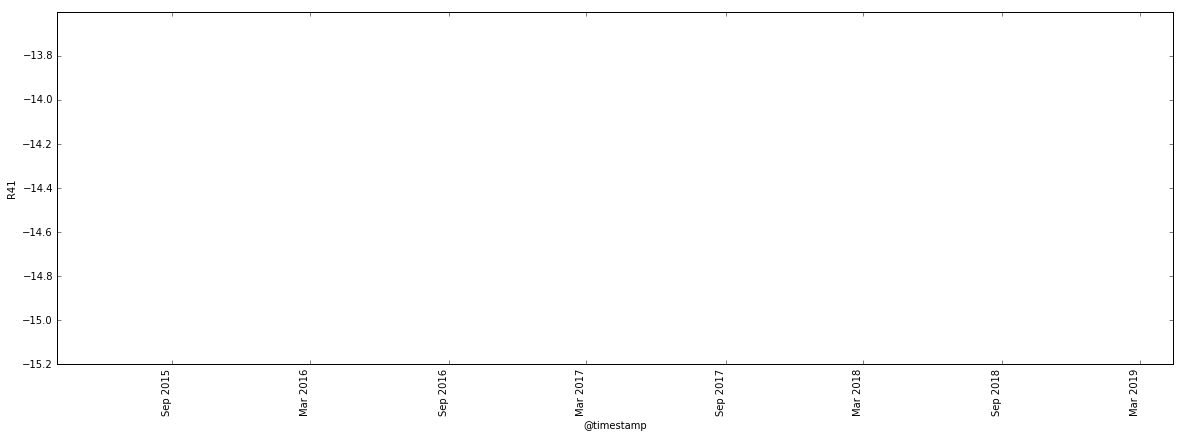

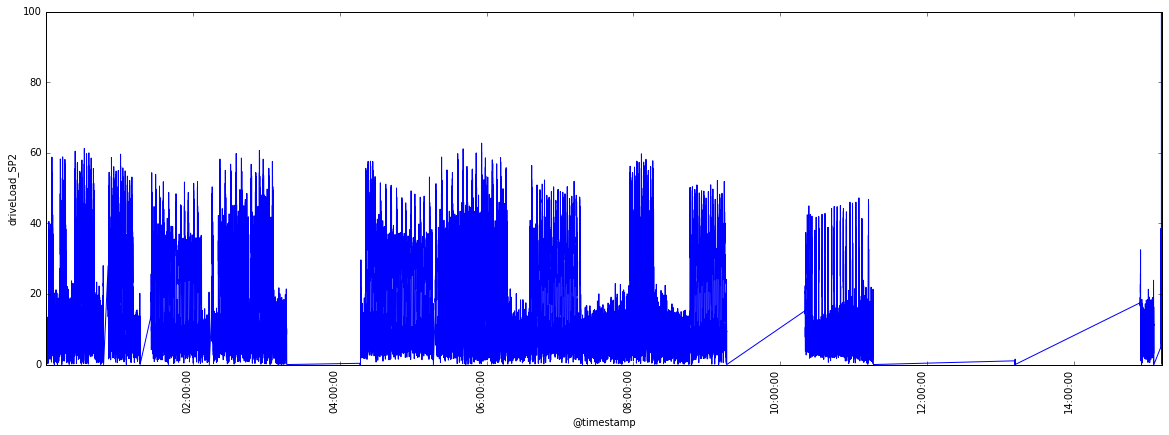

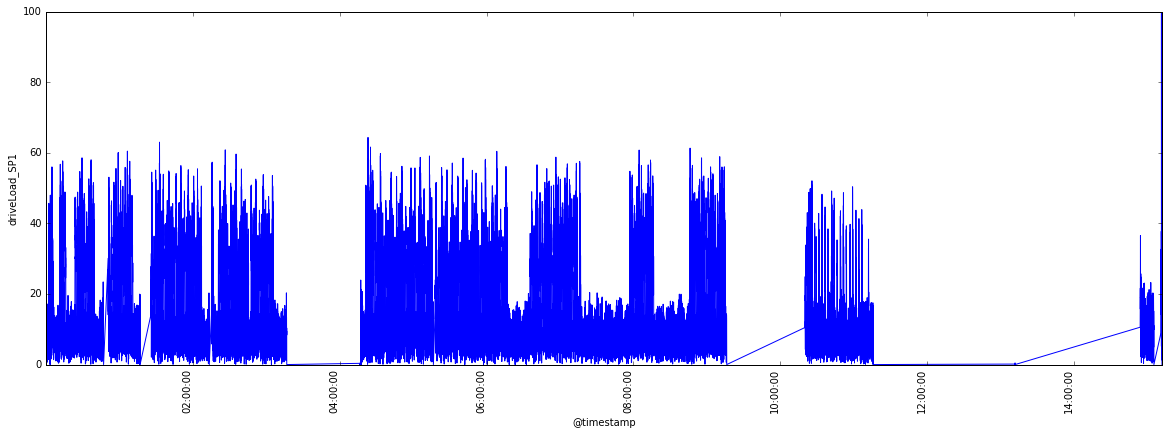

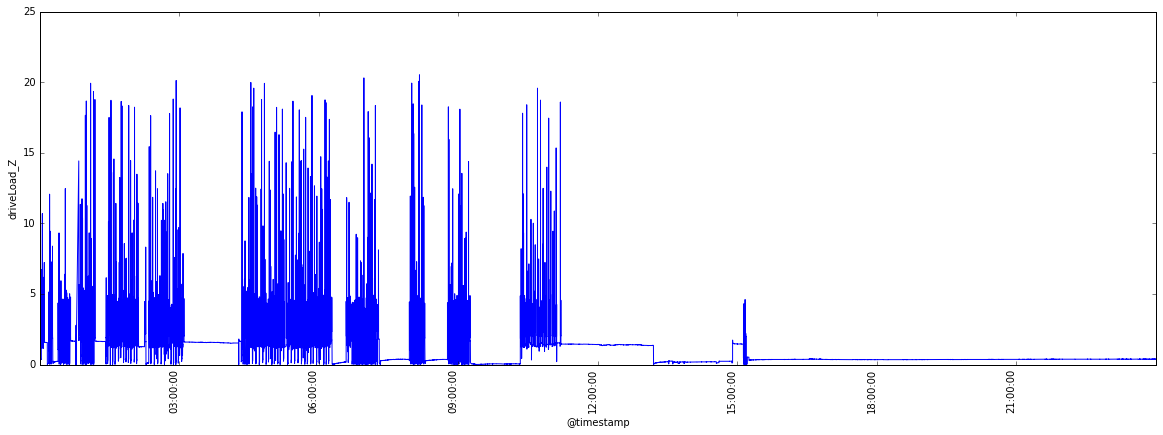

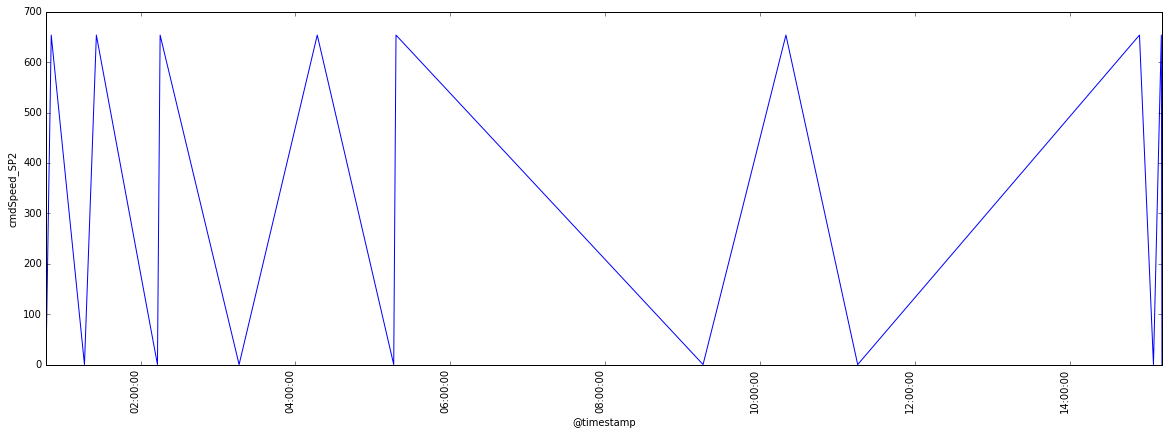

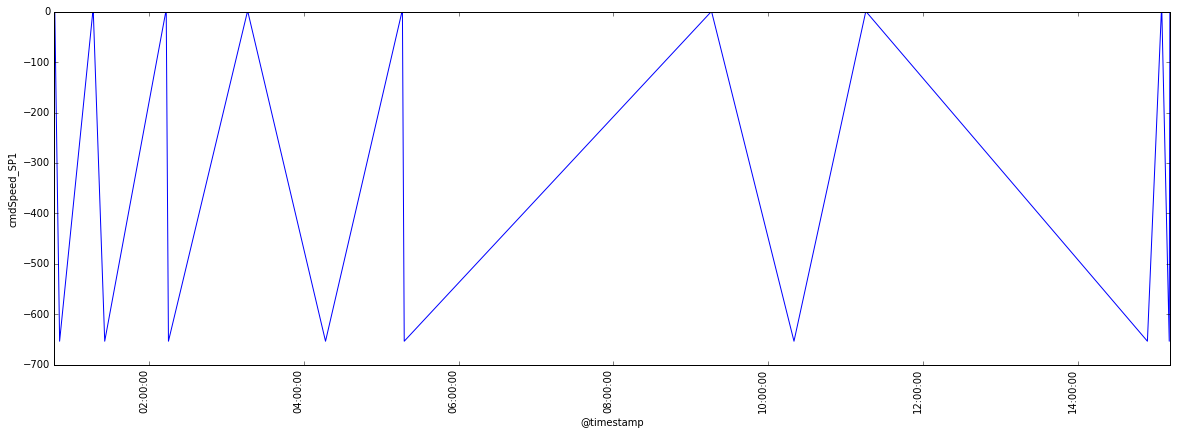

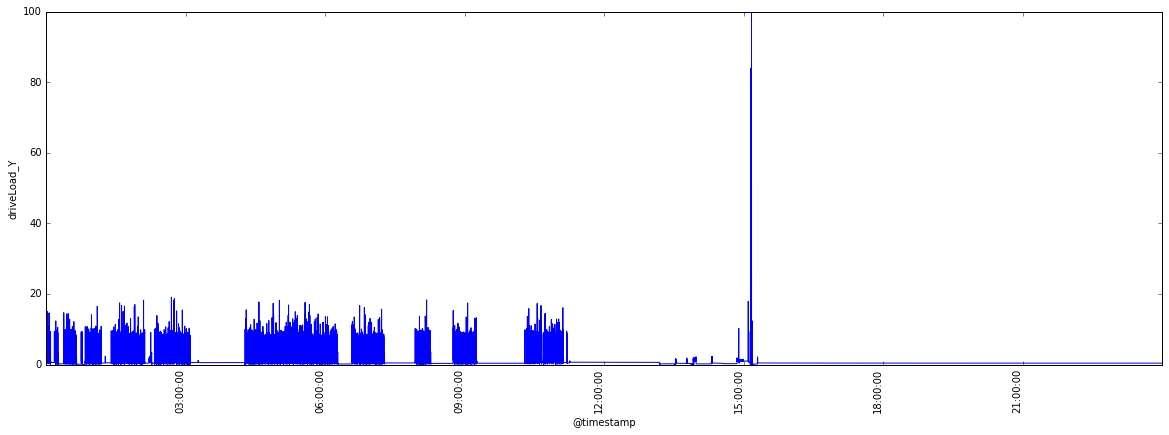

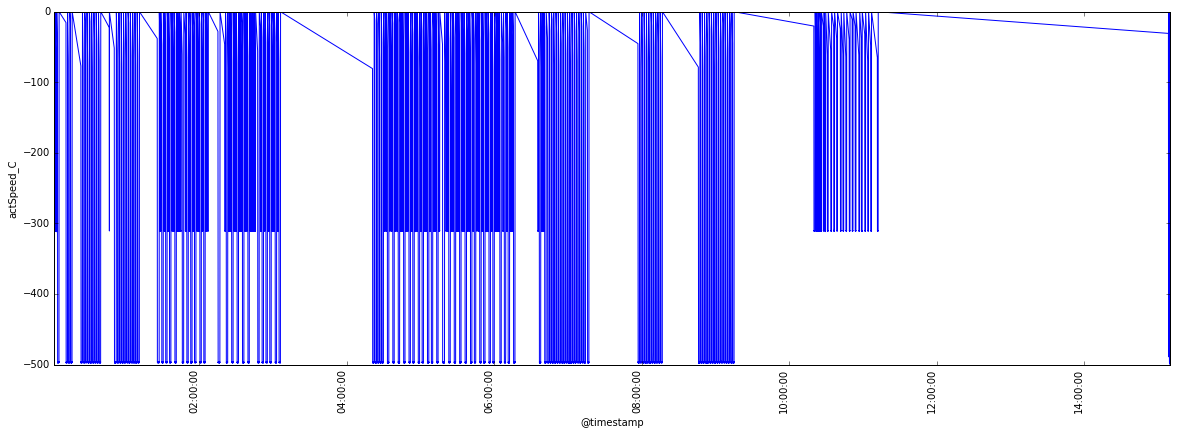

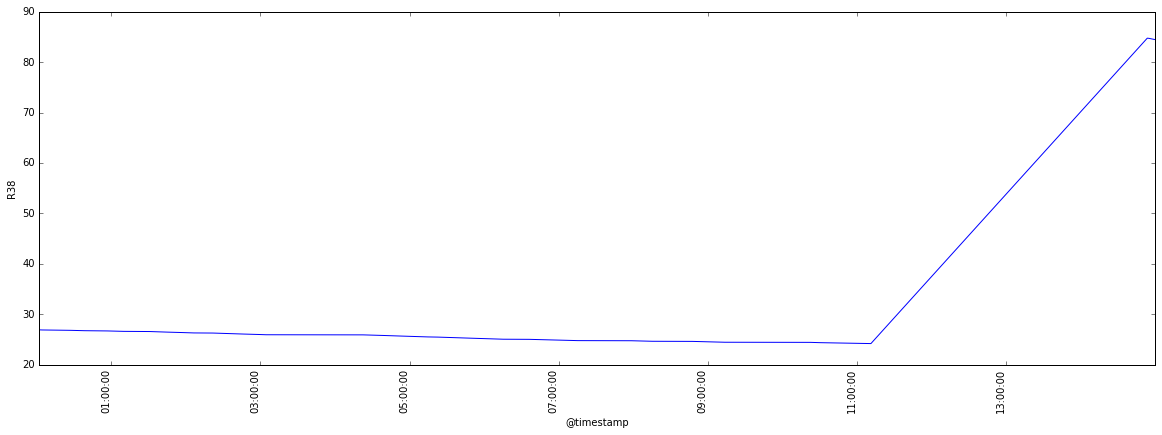

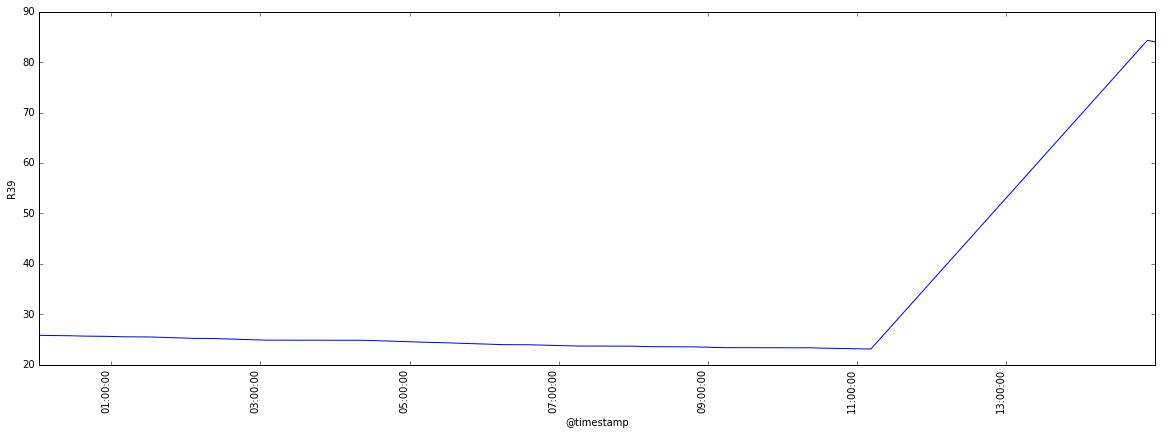

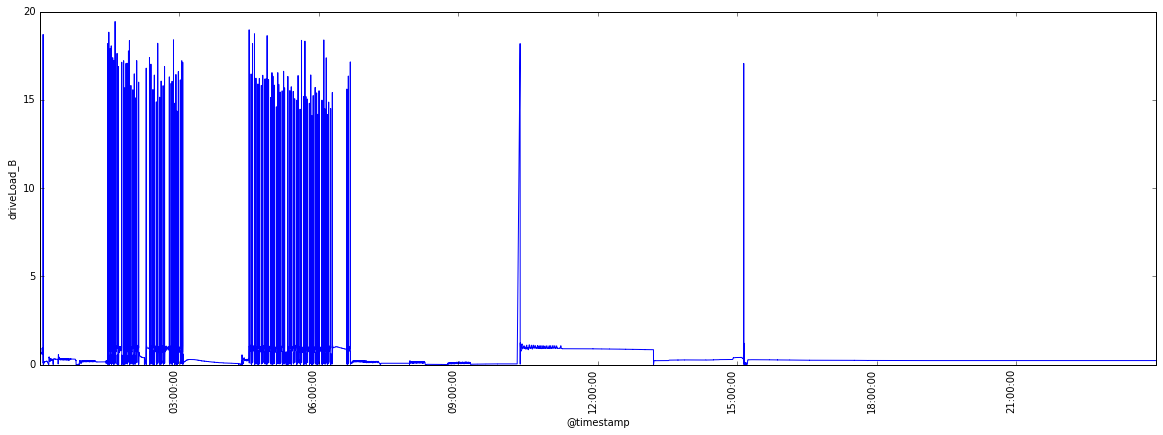

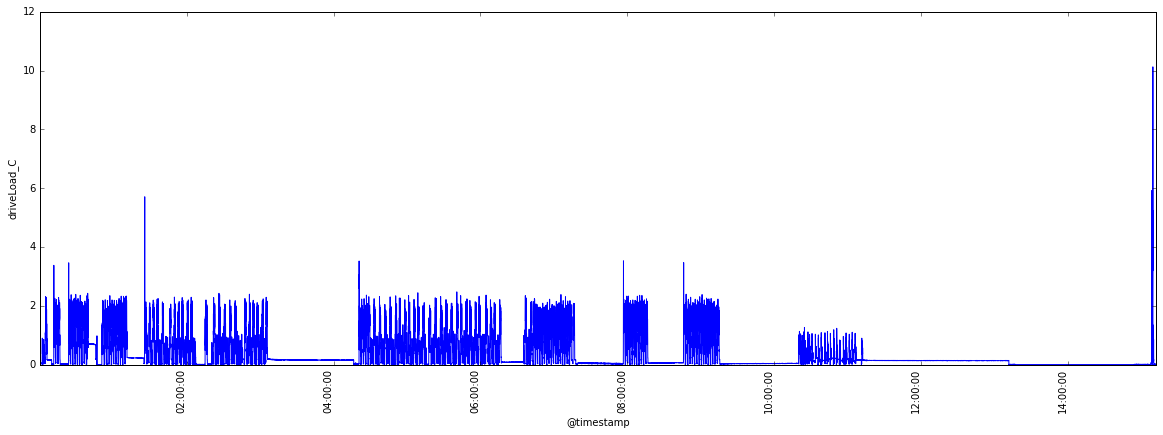

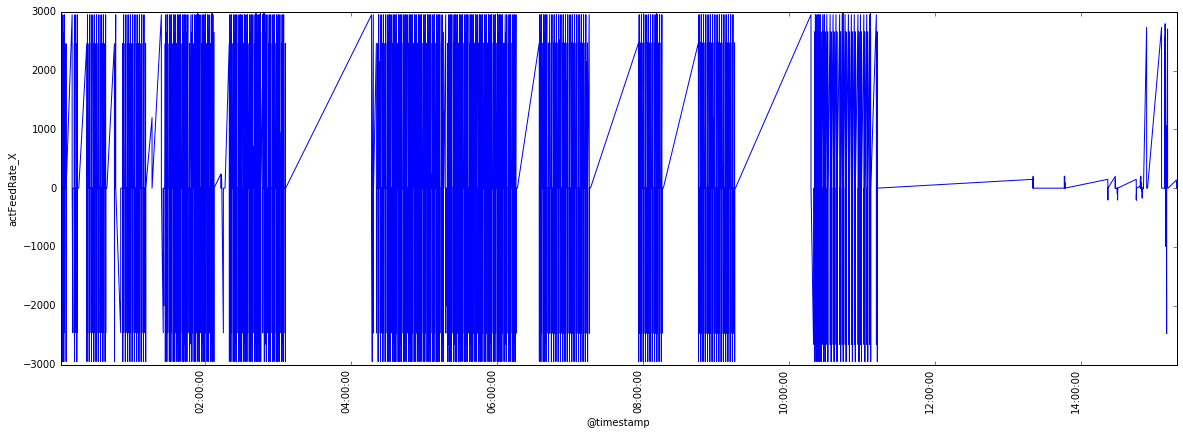

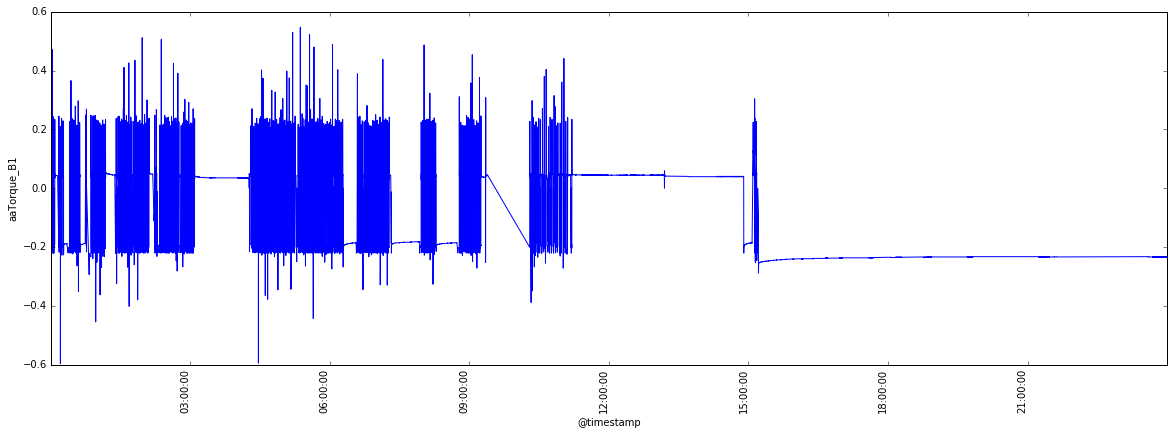

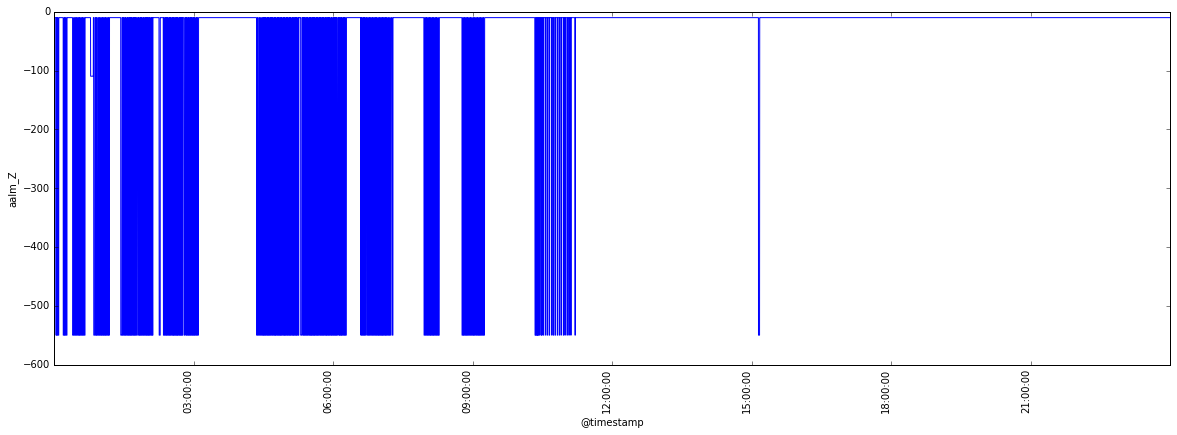

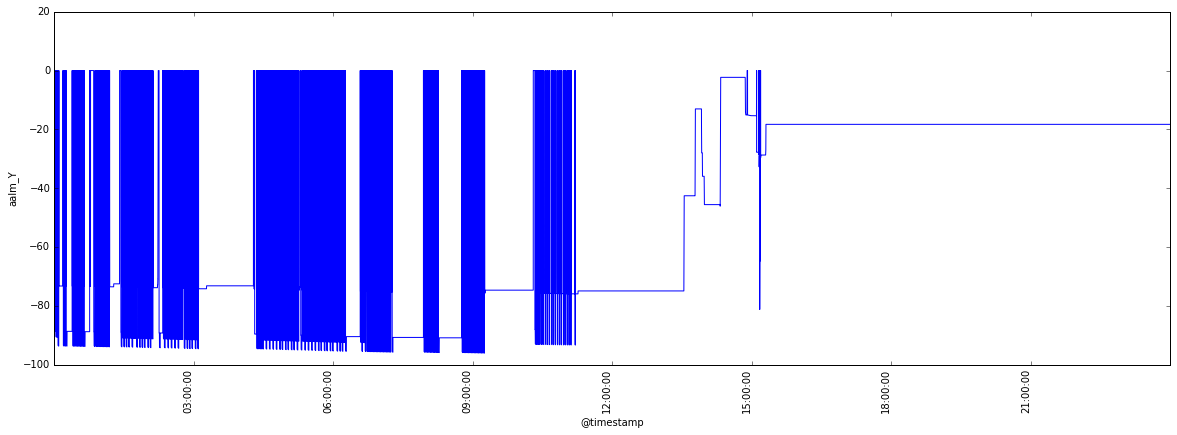

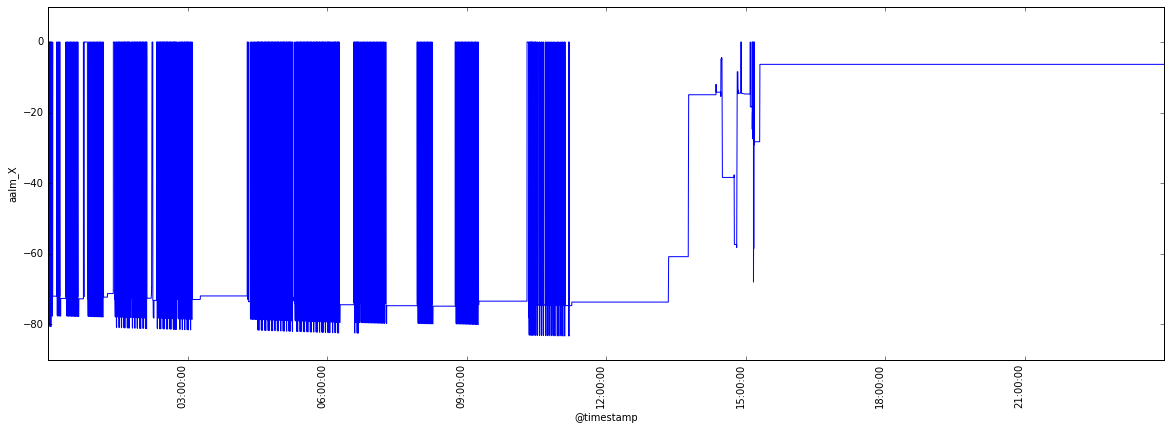

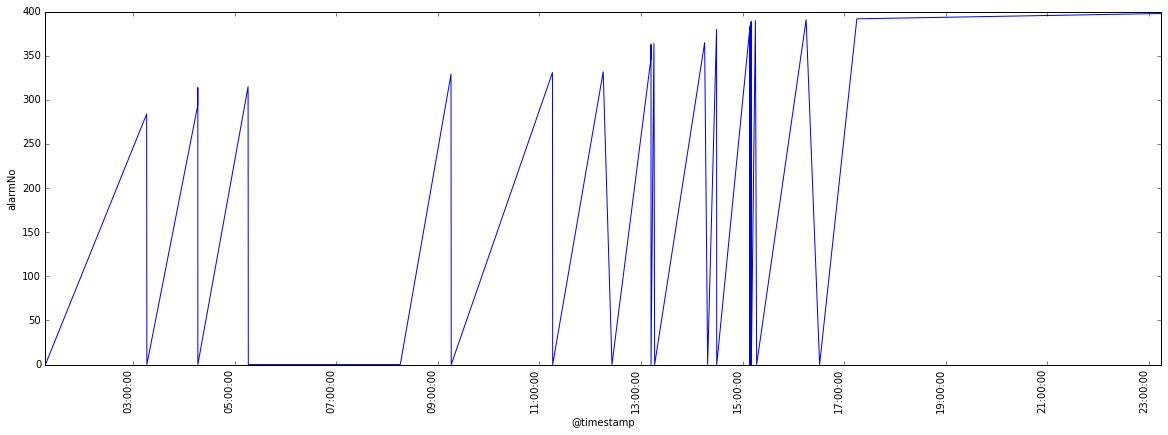

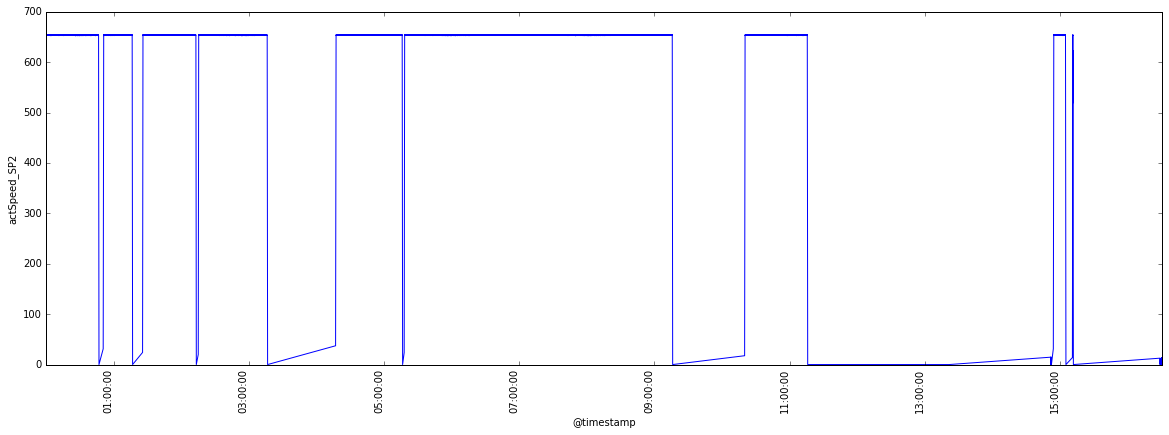

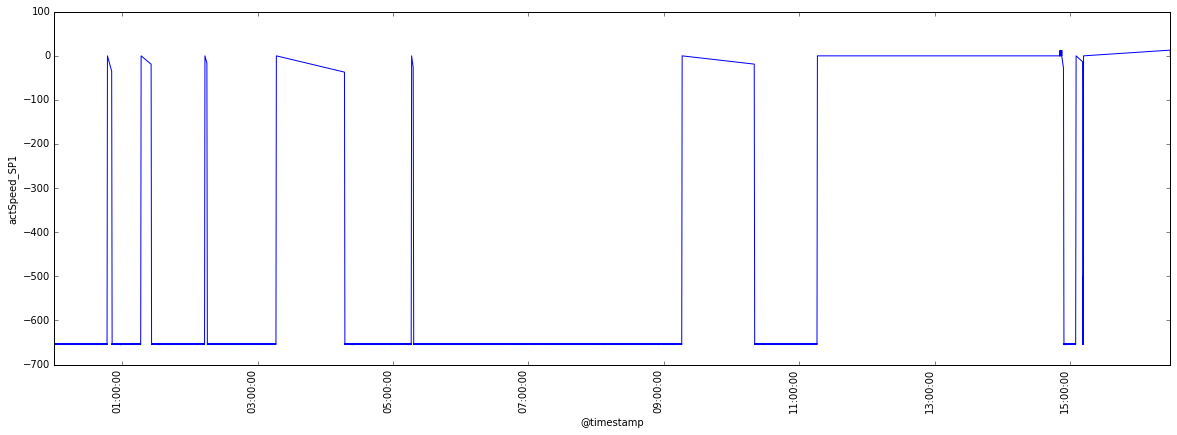

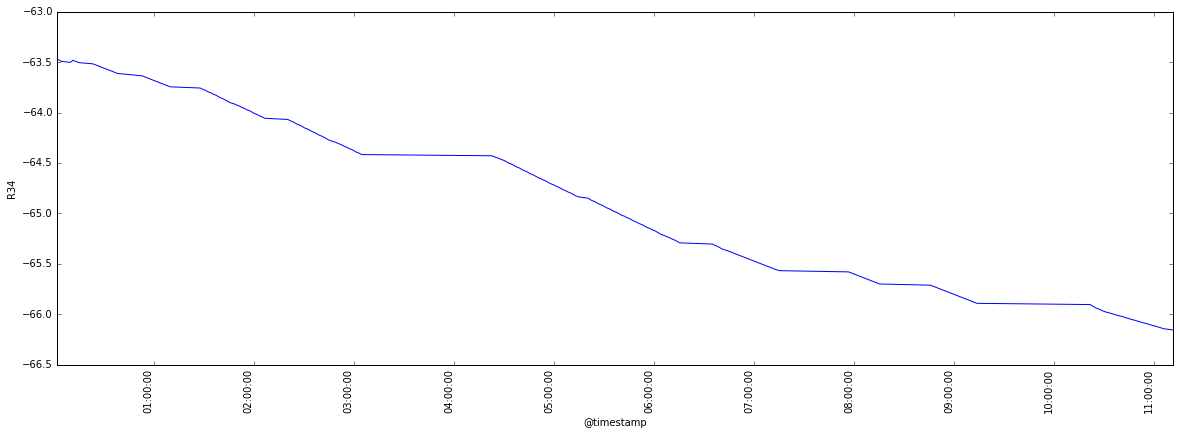

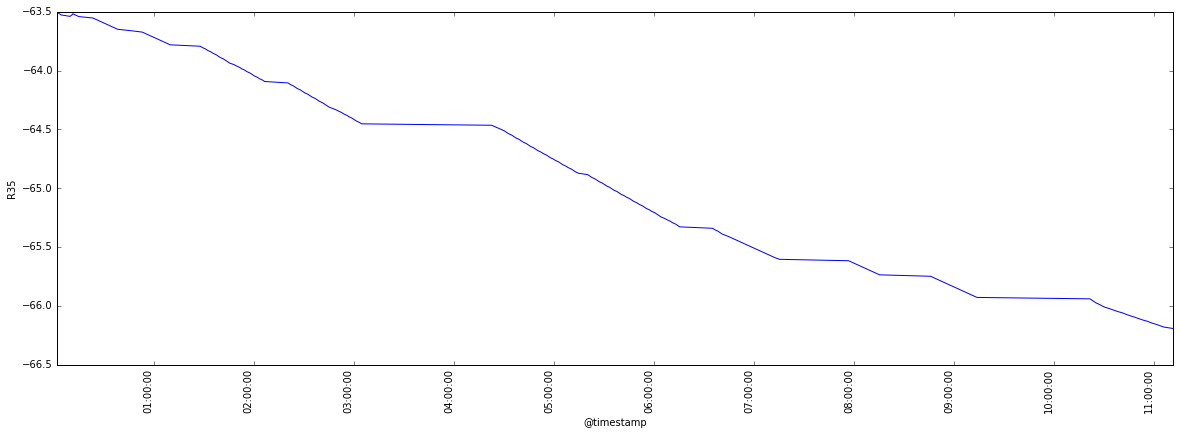

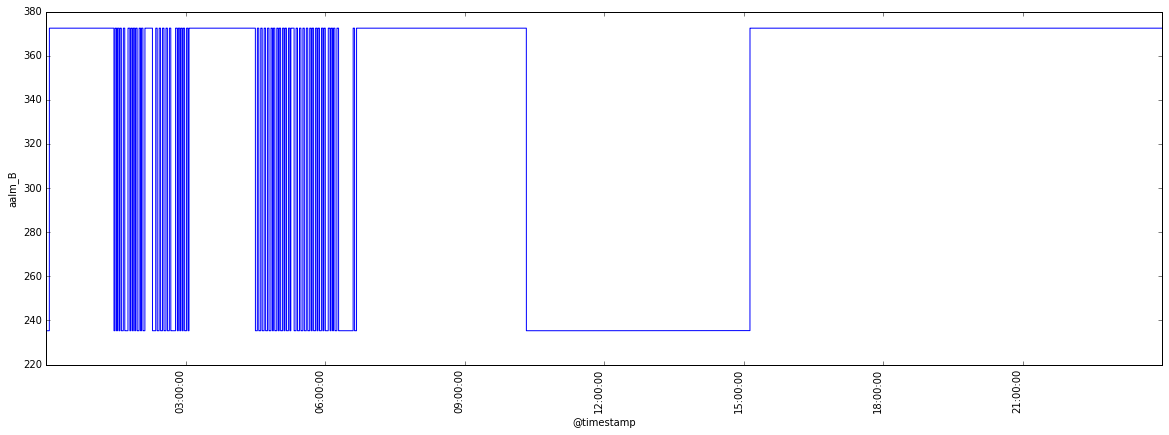

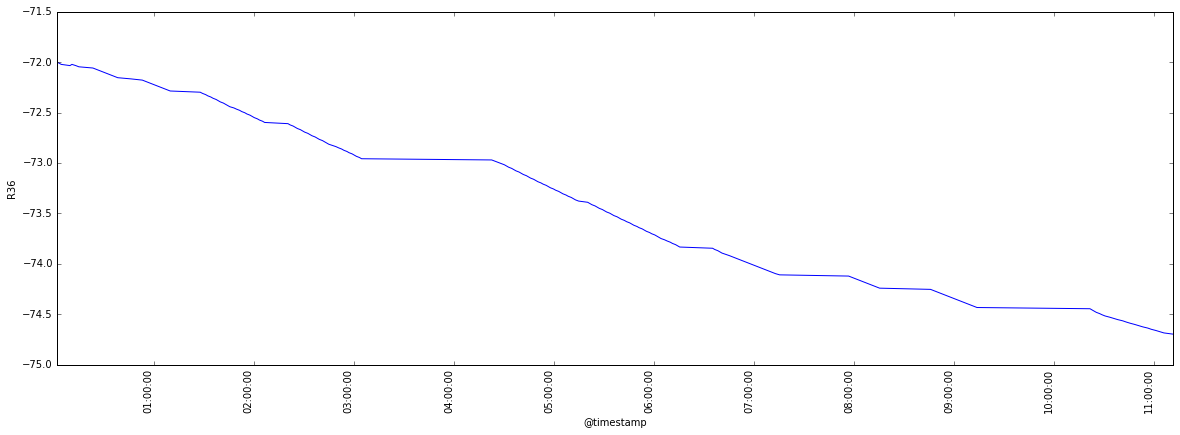

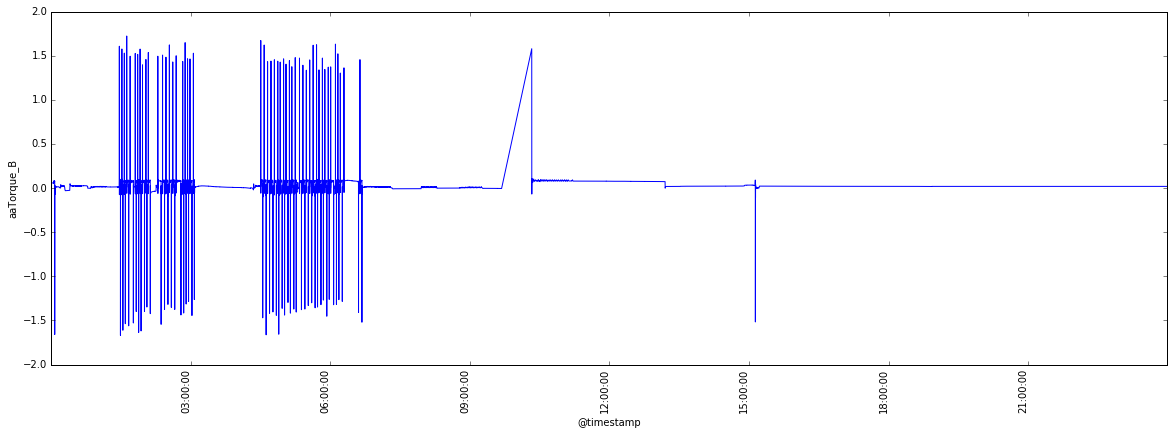

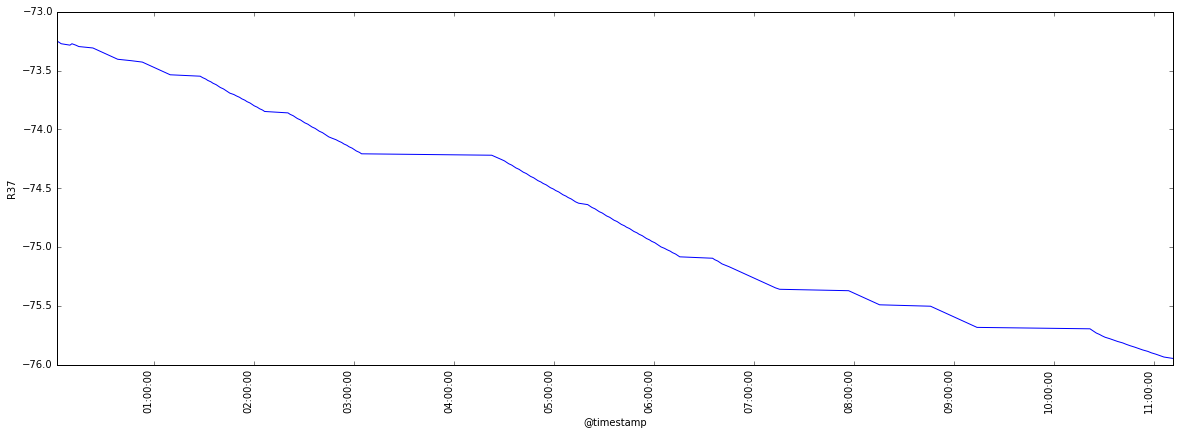

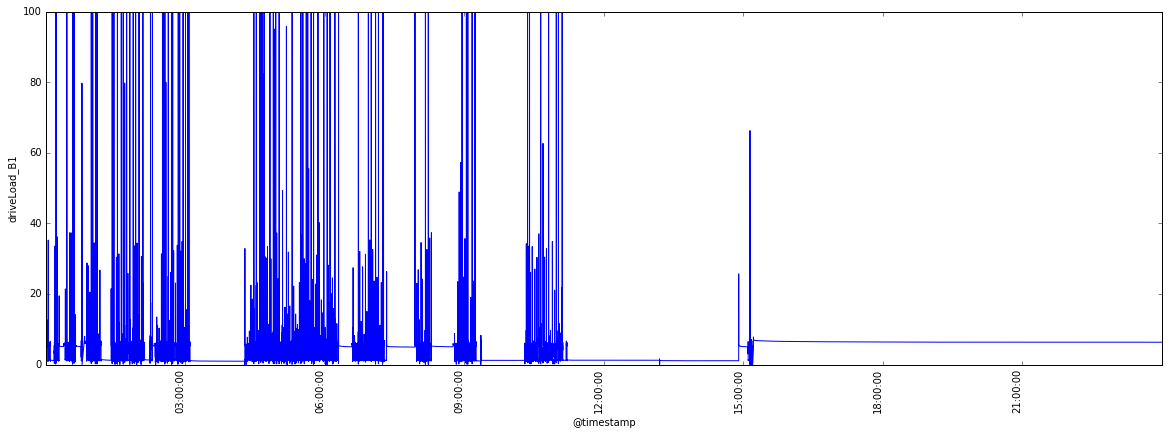

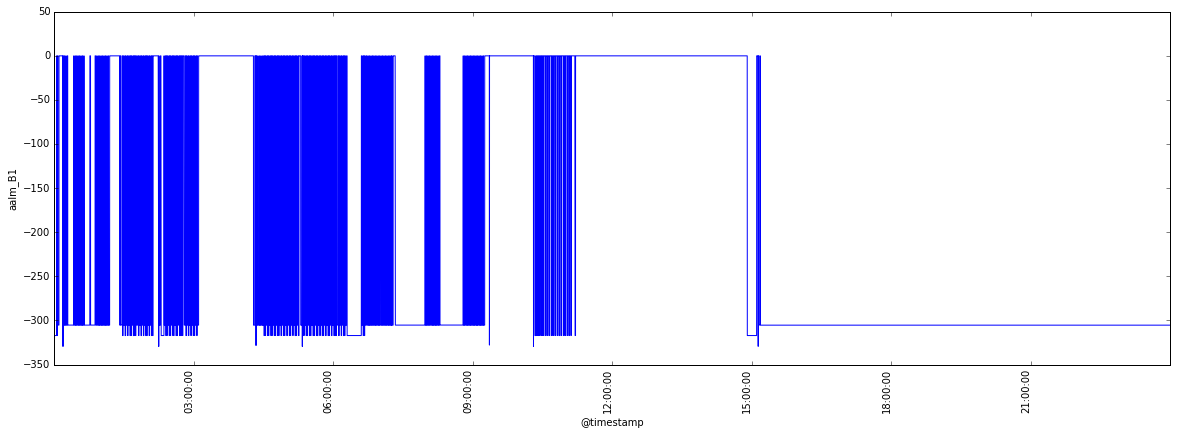

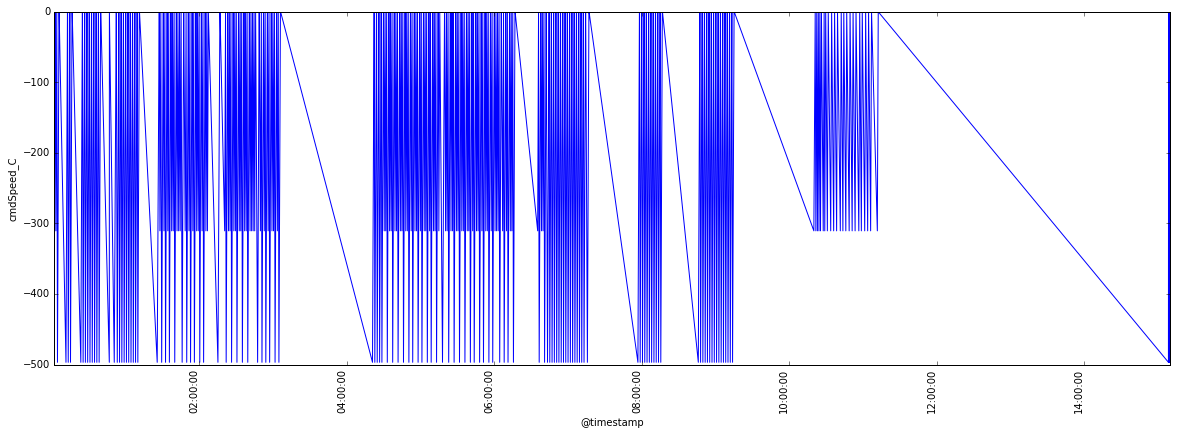

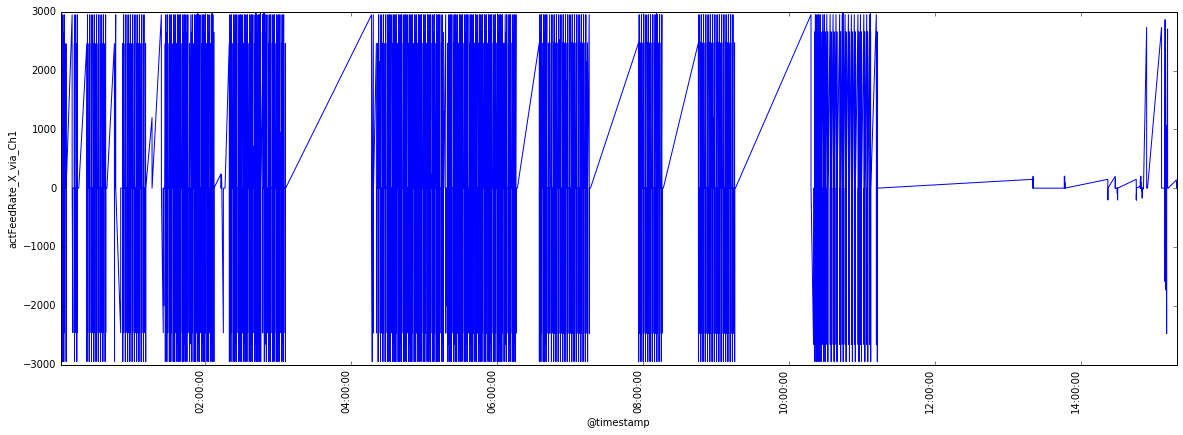

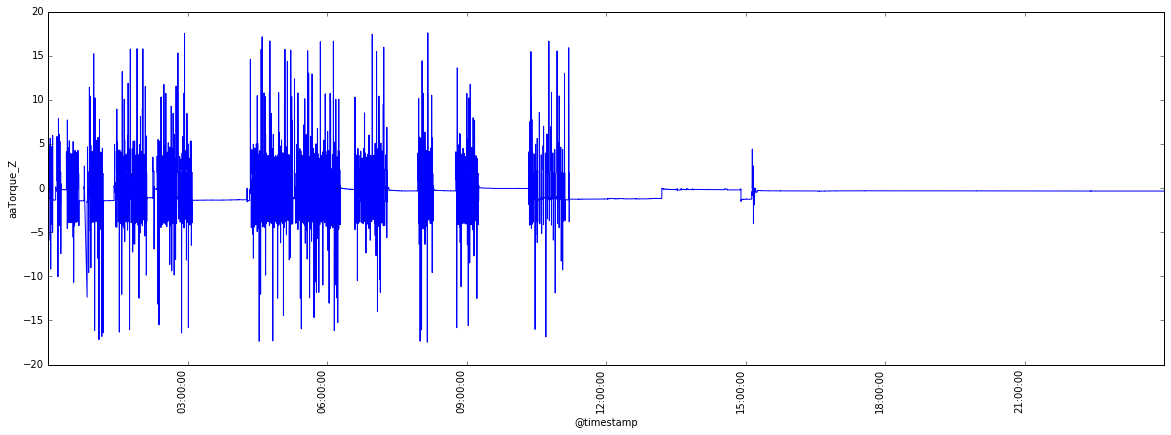

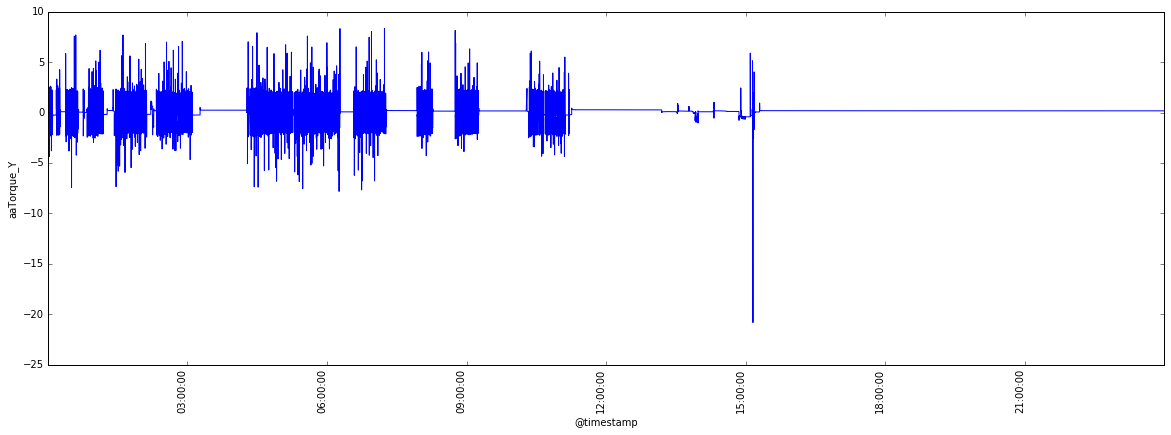

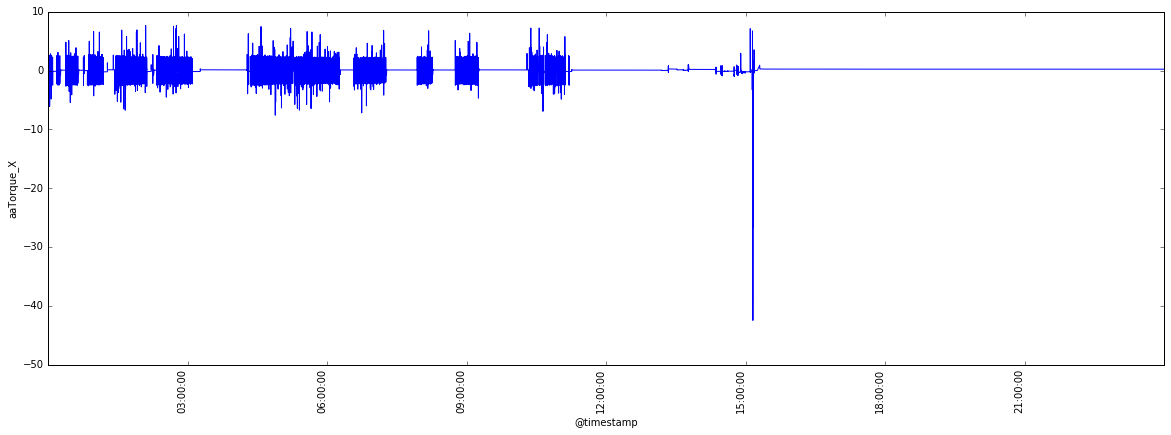

In [9]:
for key in df_dict:
    frame = df_dict[key]
    frame['value'].plot(figsize=(20,7))
    plt.xticks(rotation='vertical')
    plt.ylabel(key)
    plt.show()

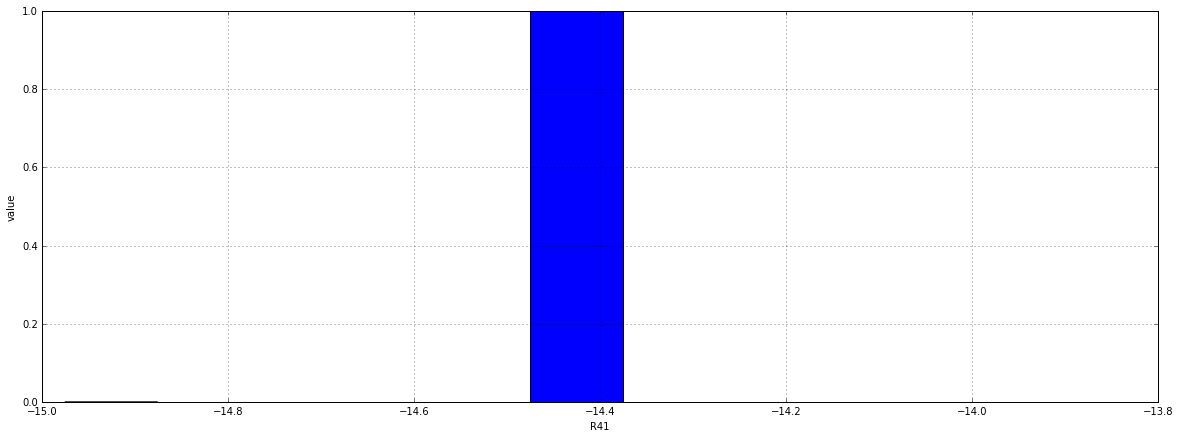

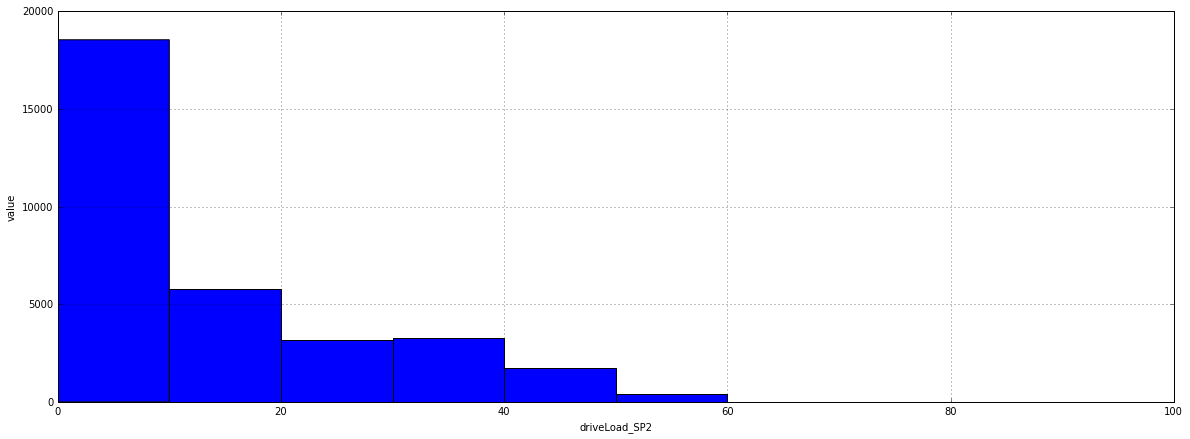

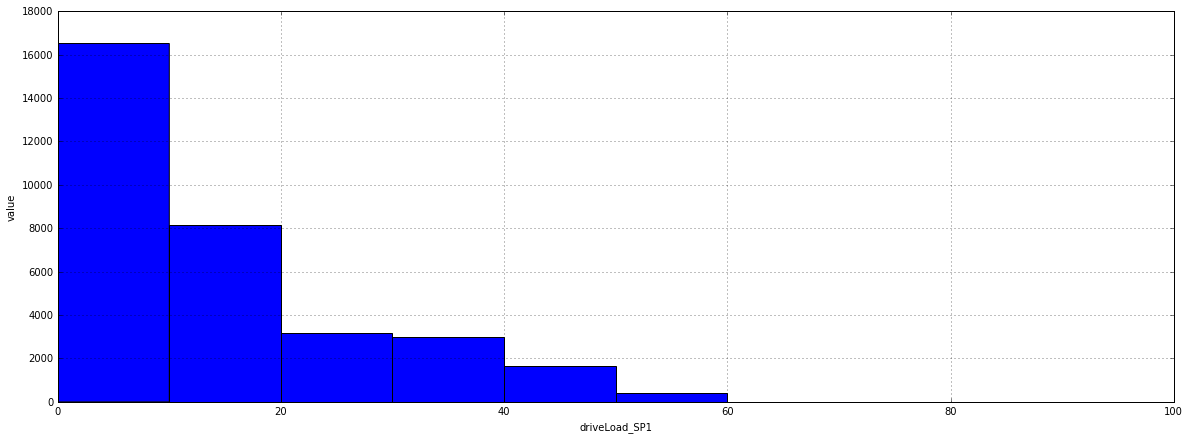

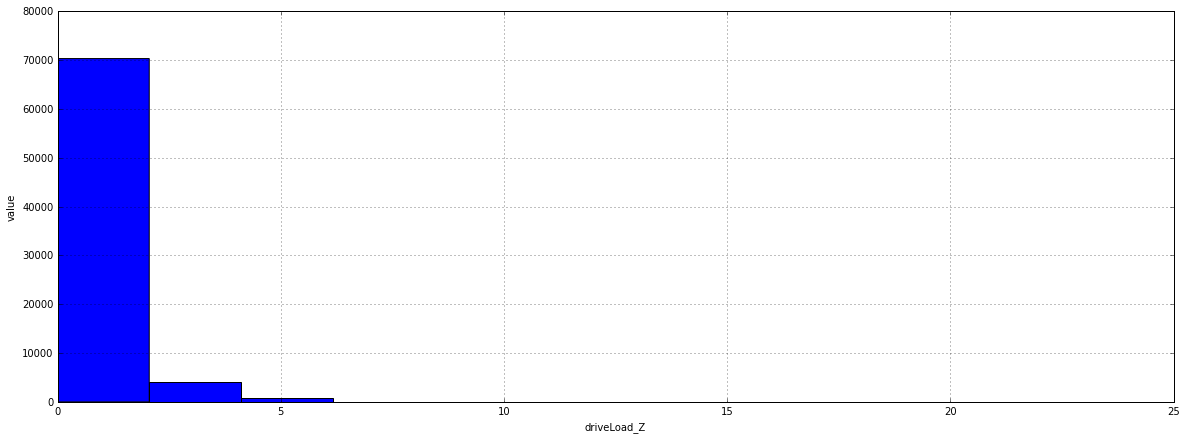

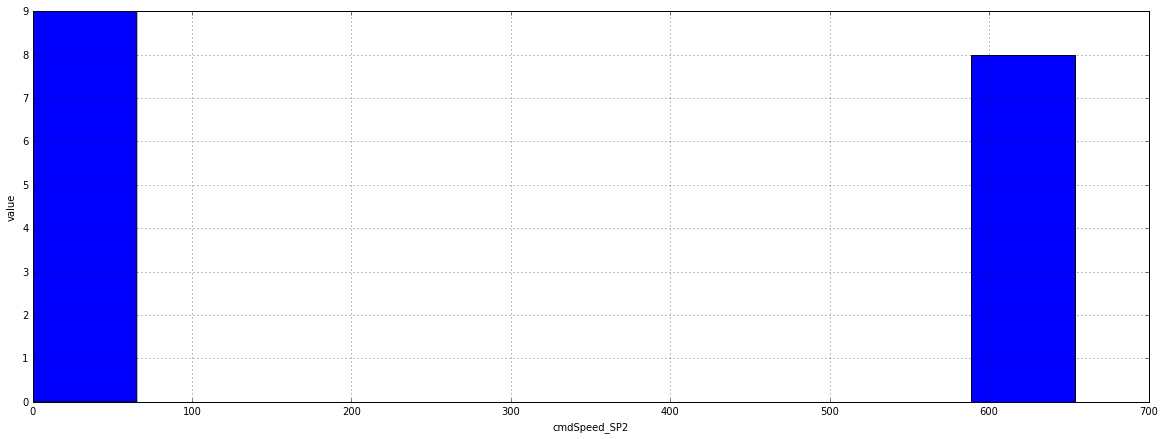

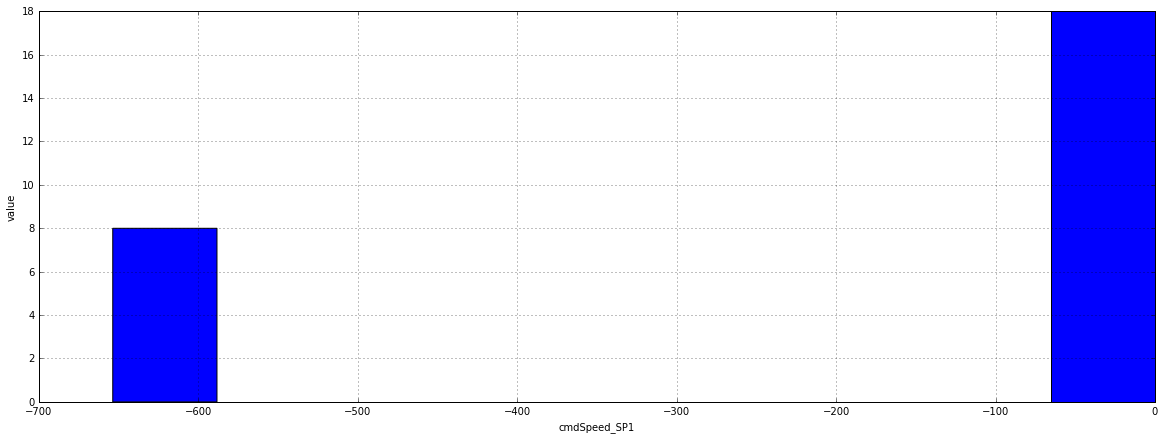

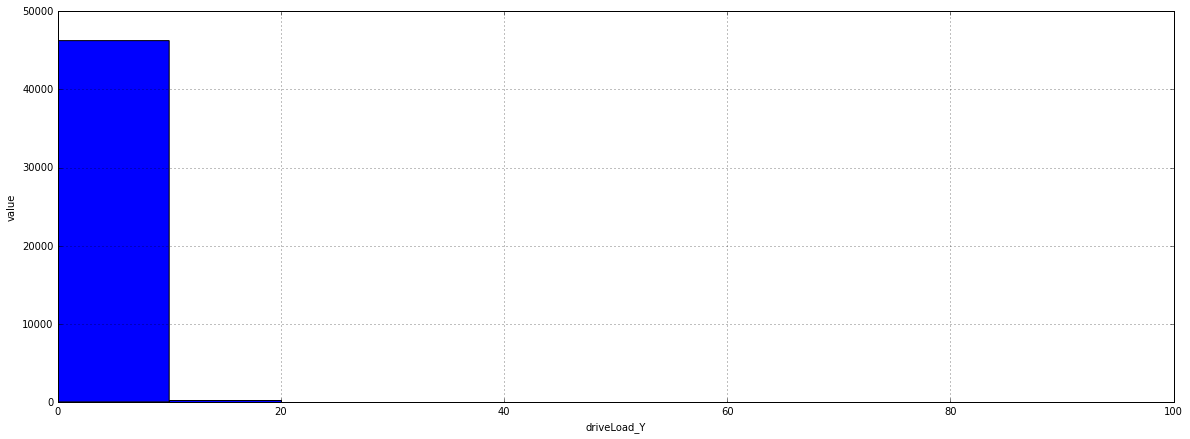

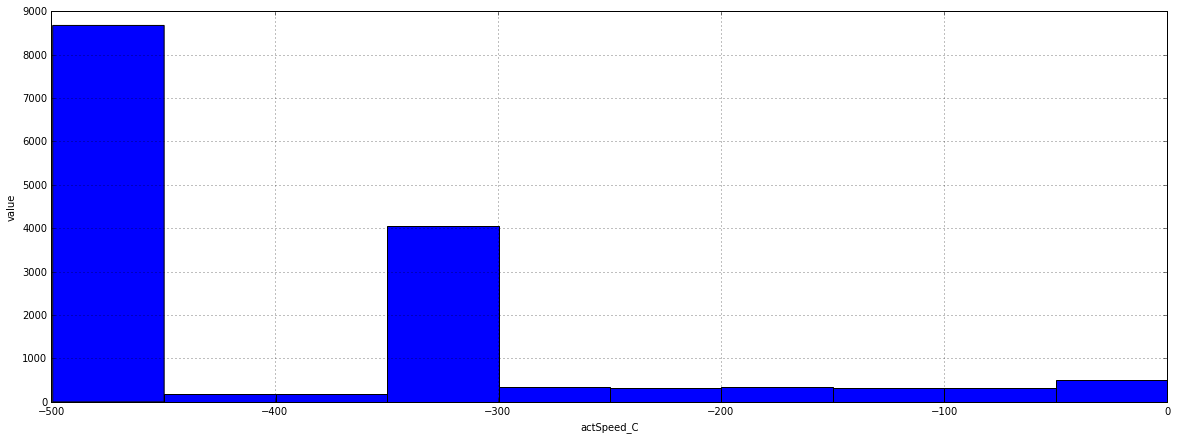

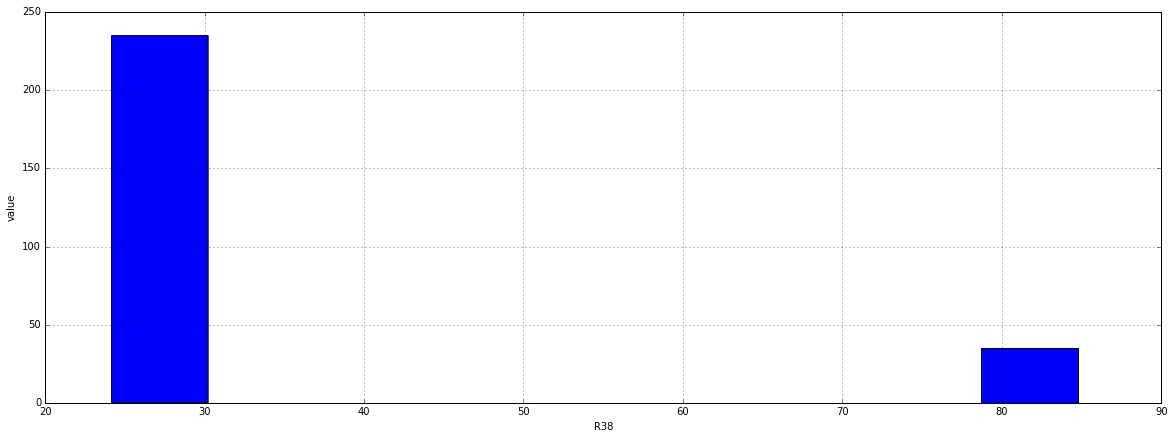

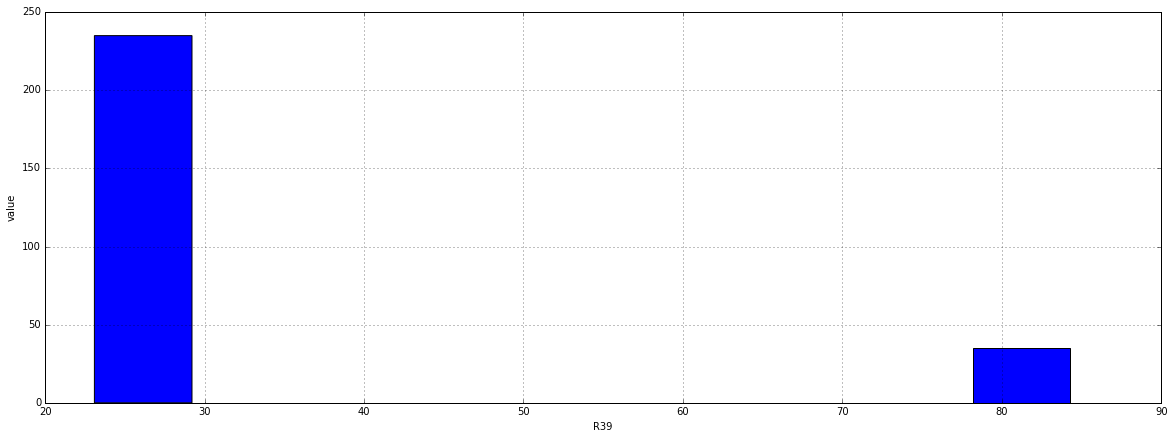

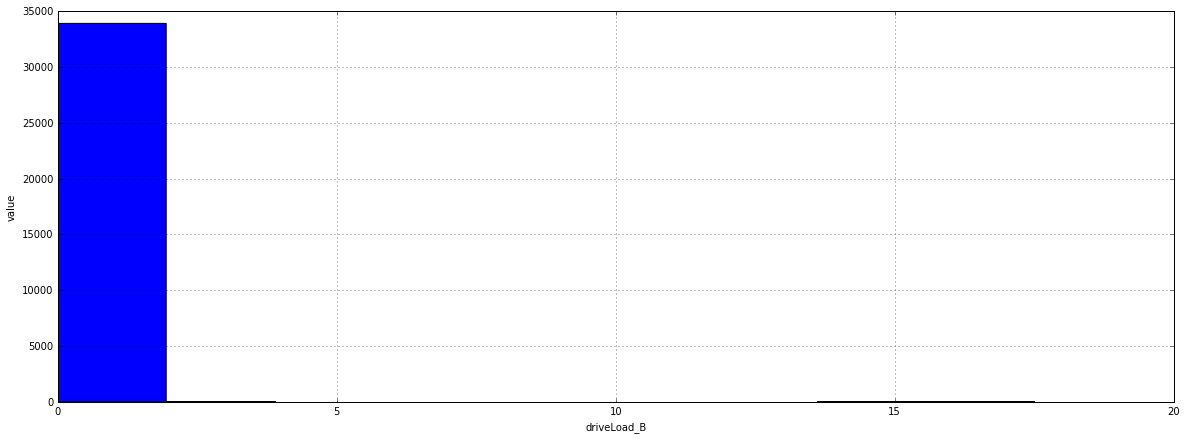

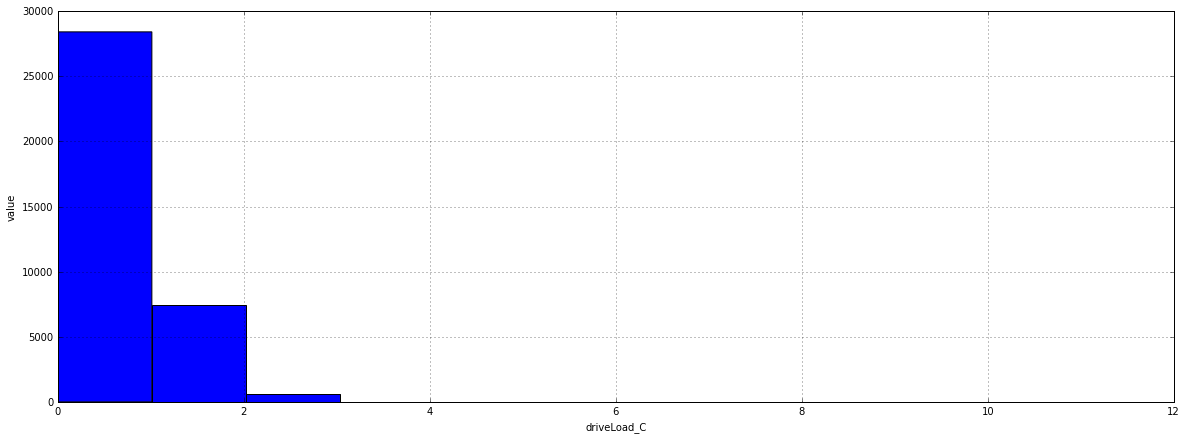

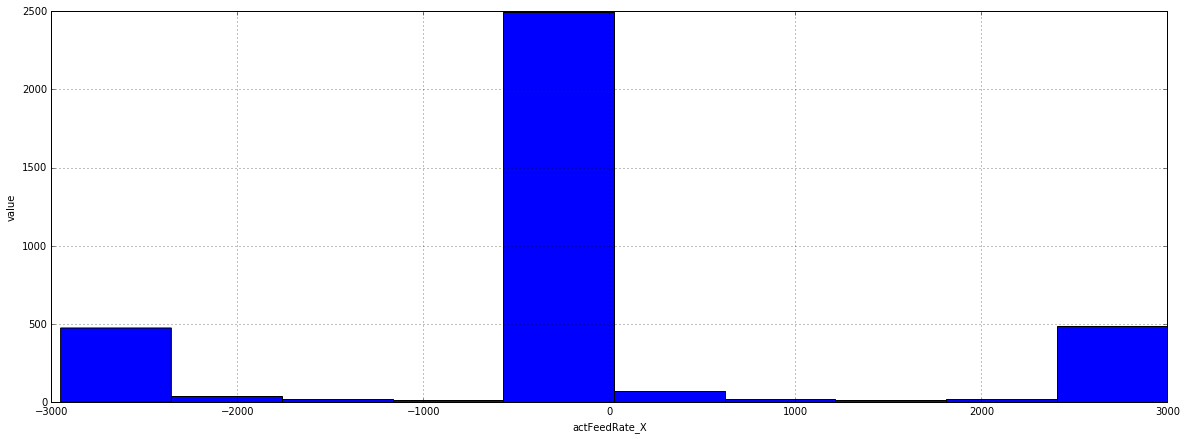

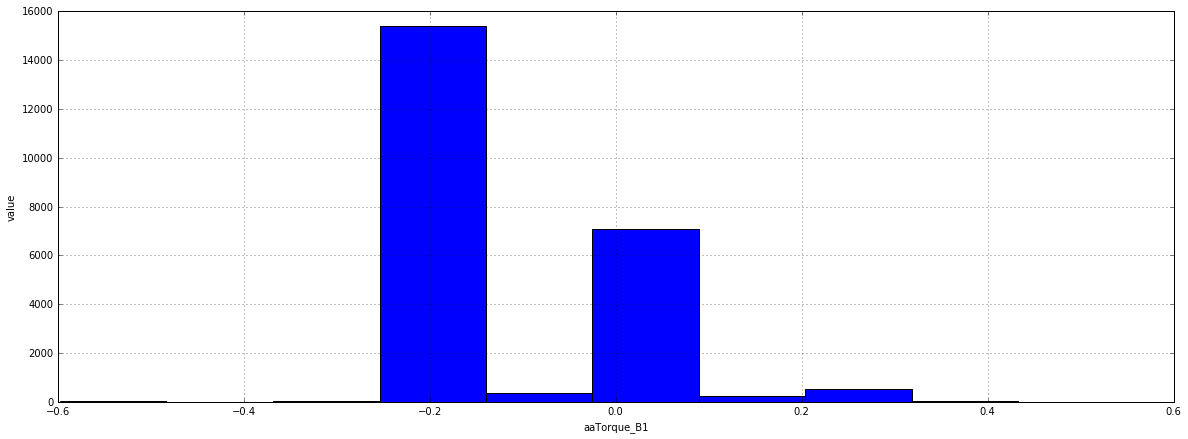

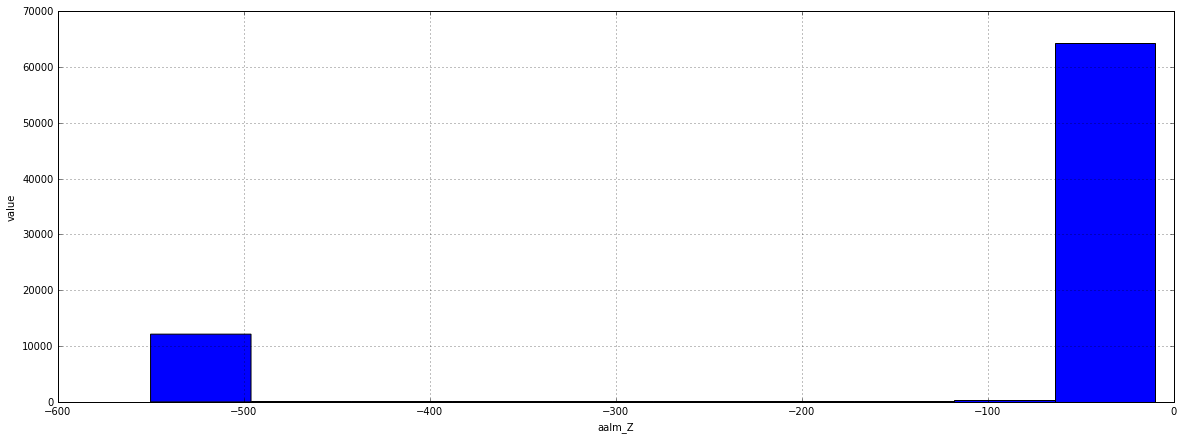

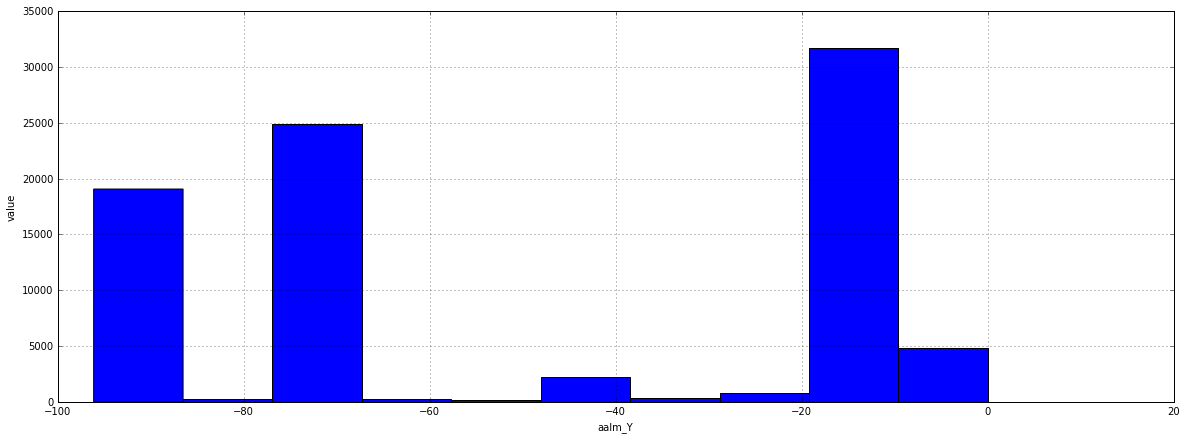

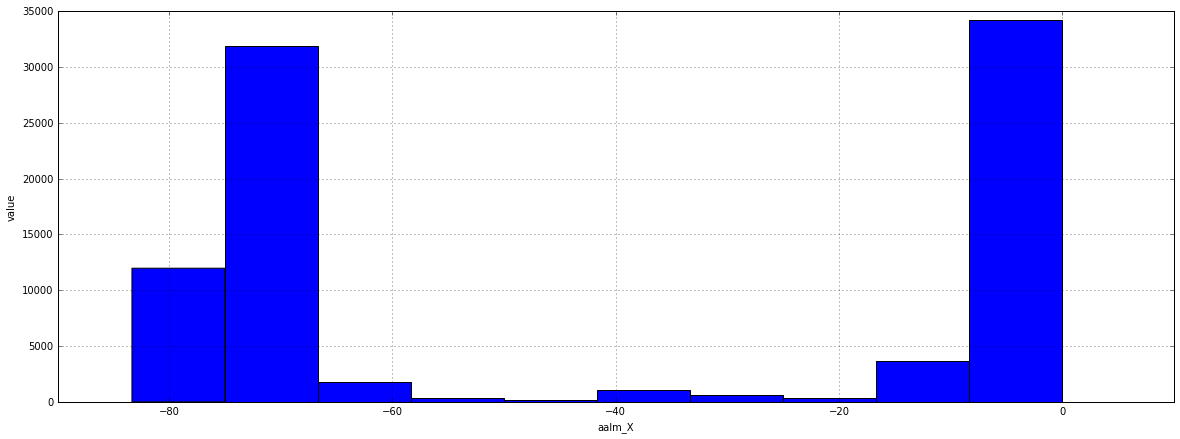

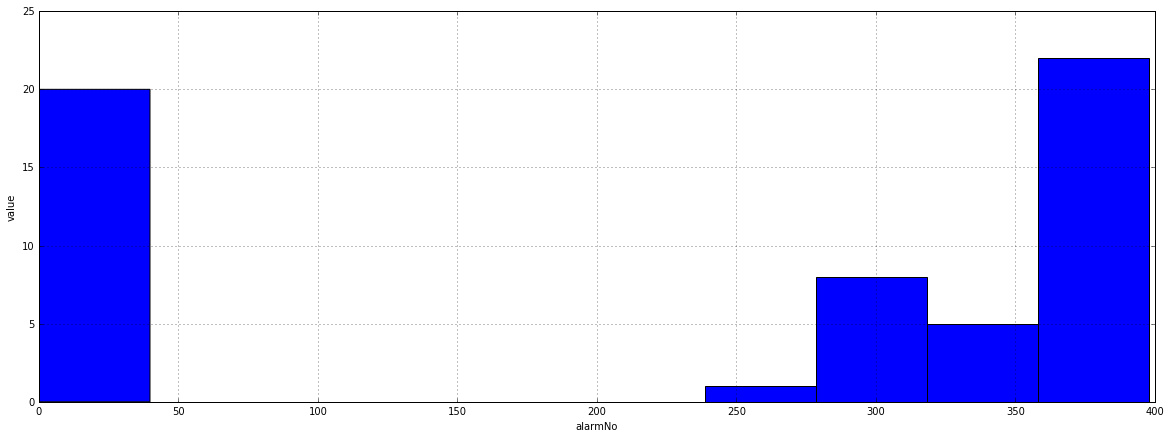

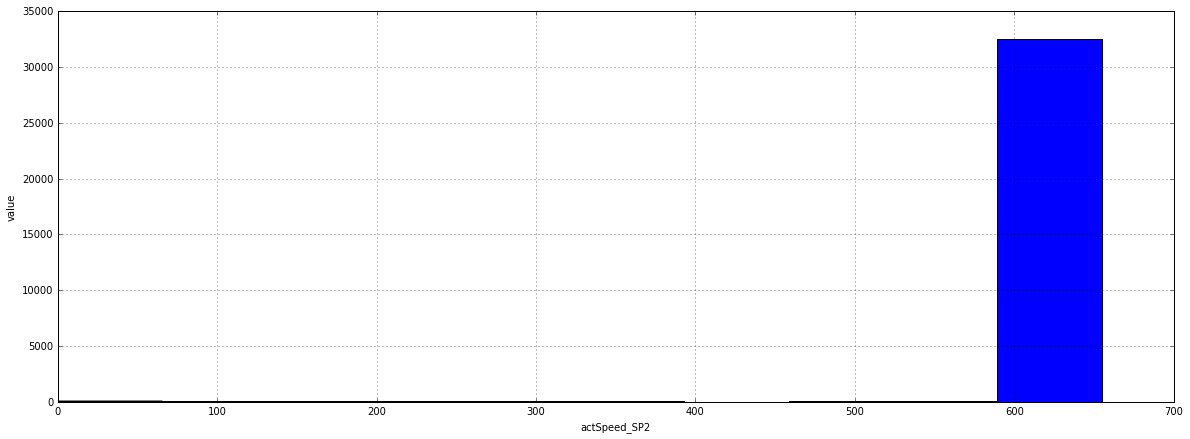

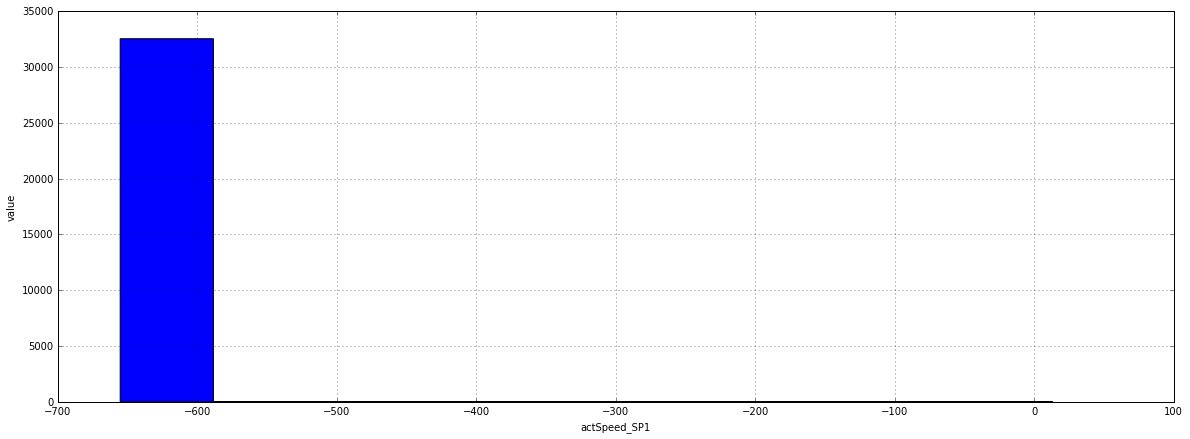

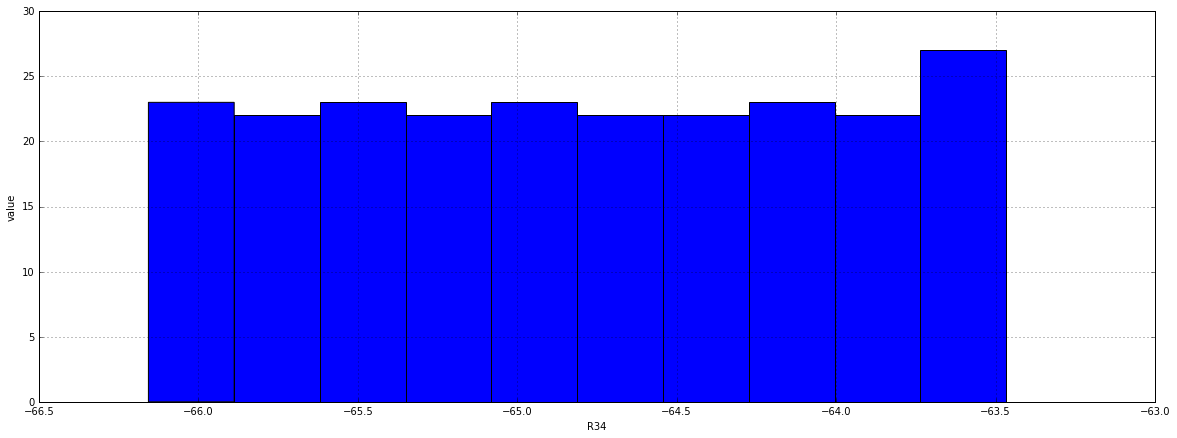

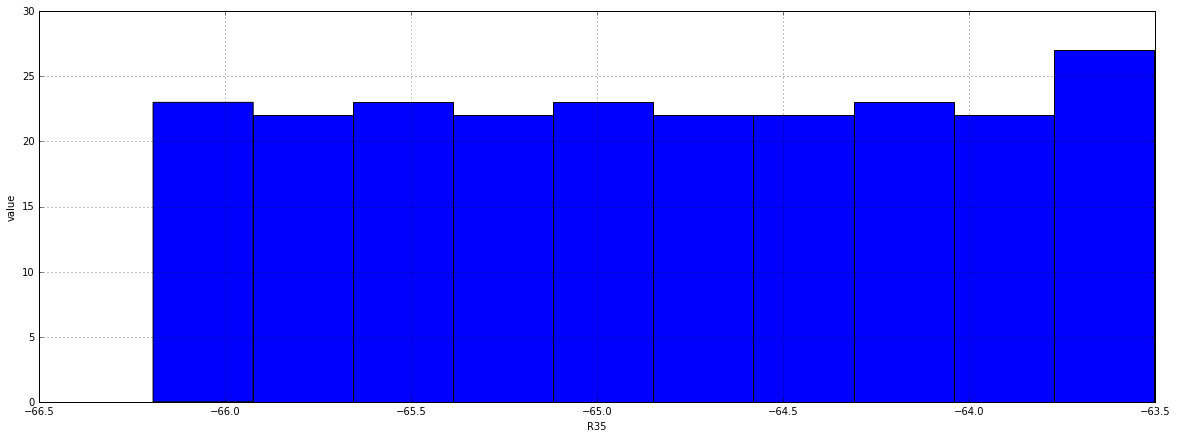

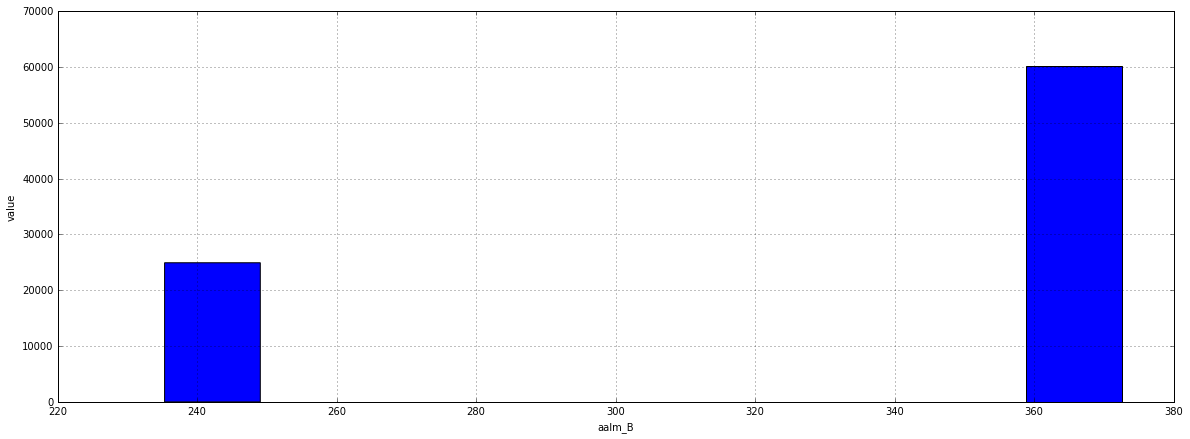

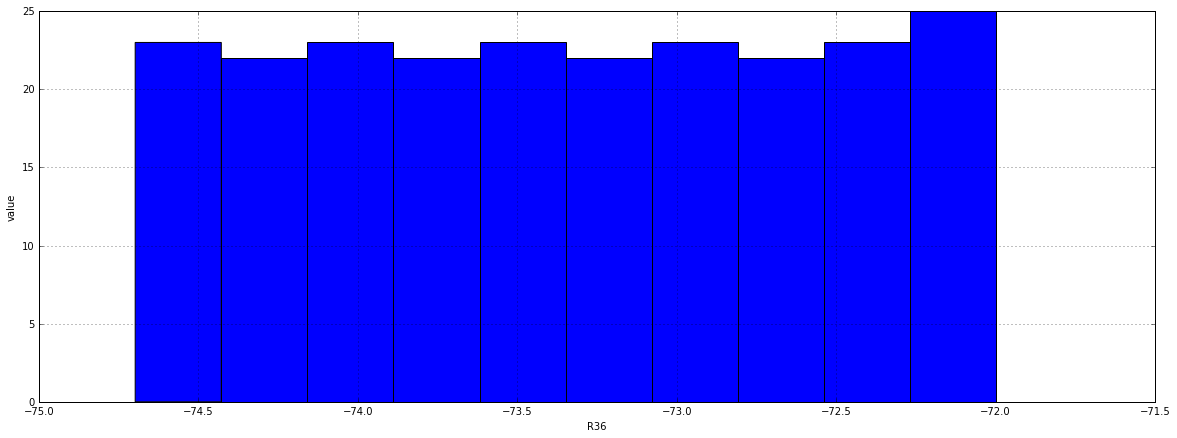

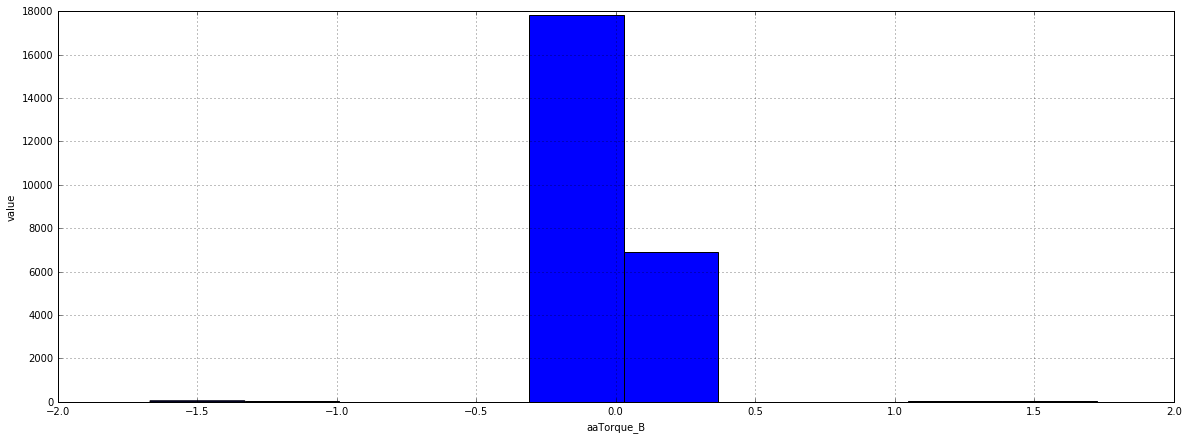

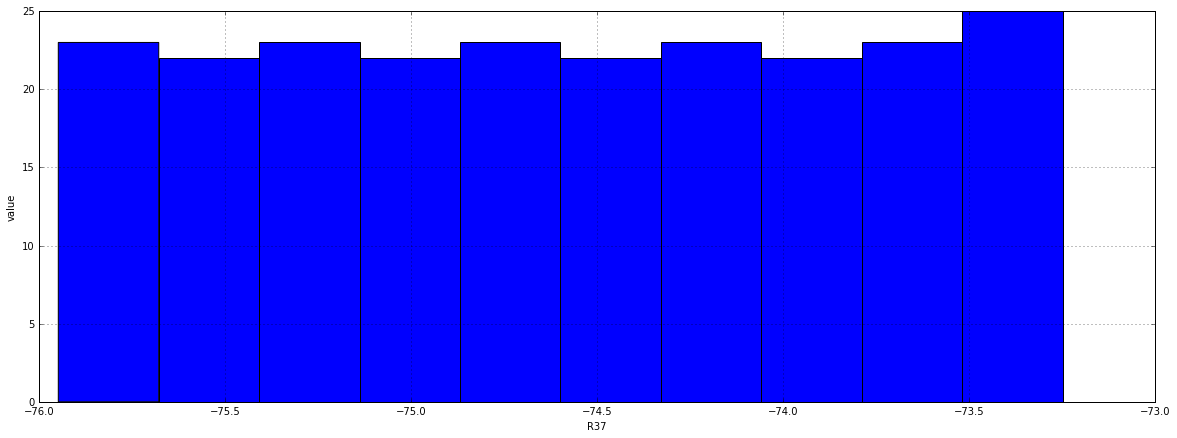

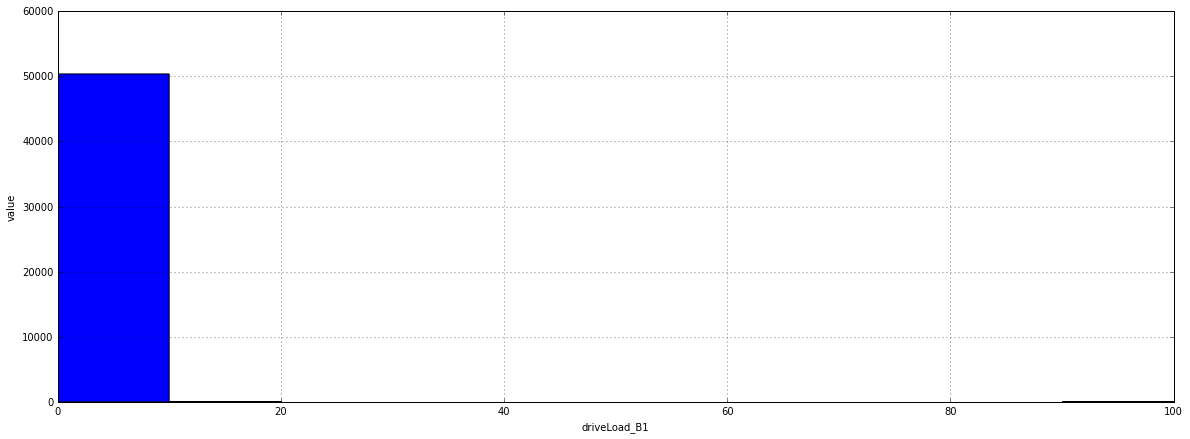

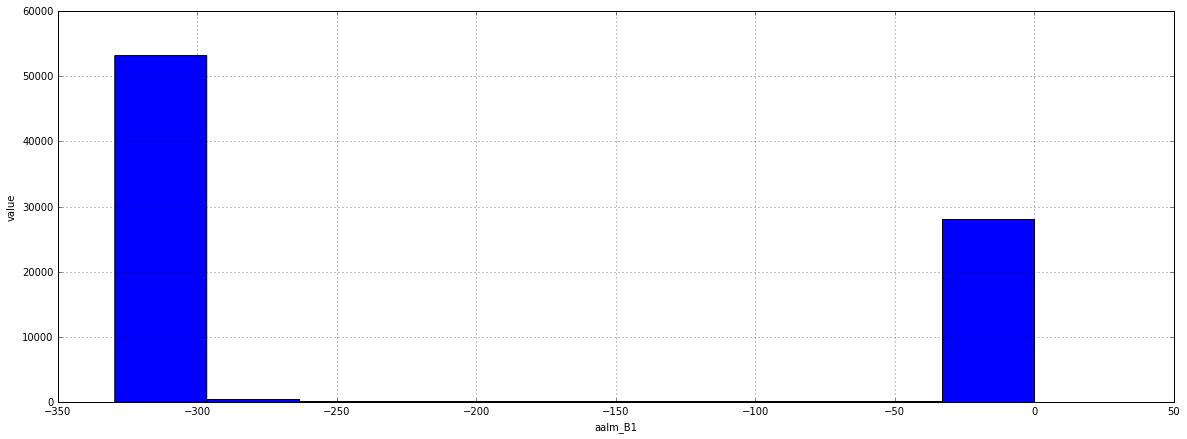

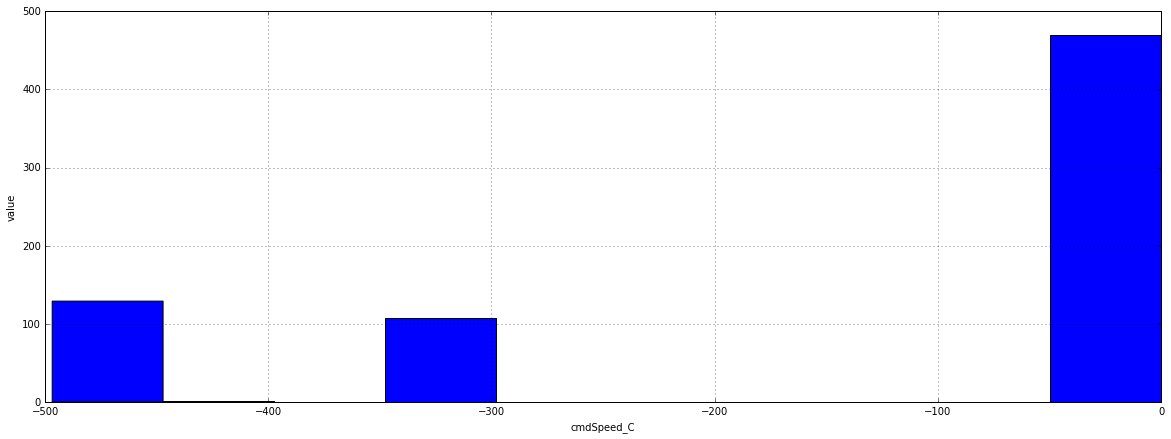

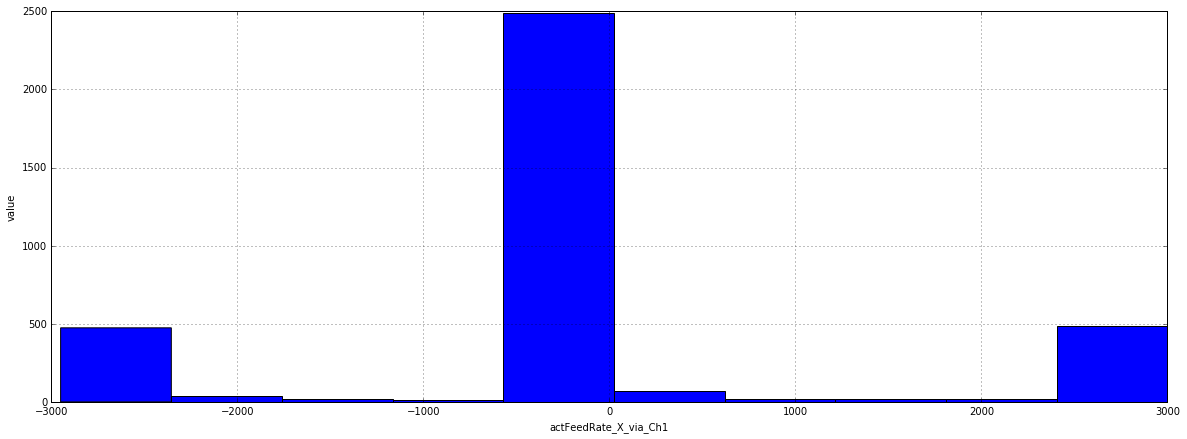

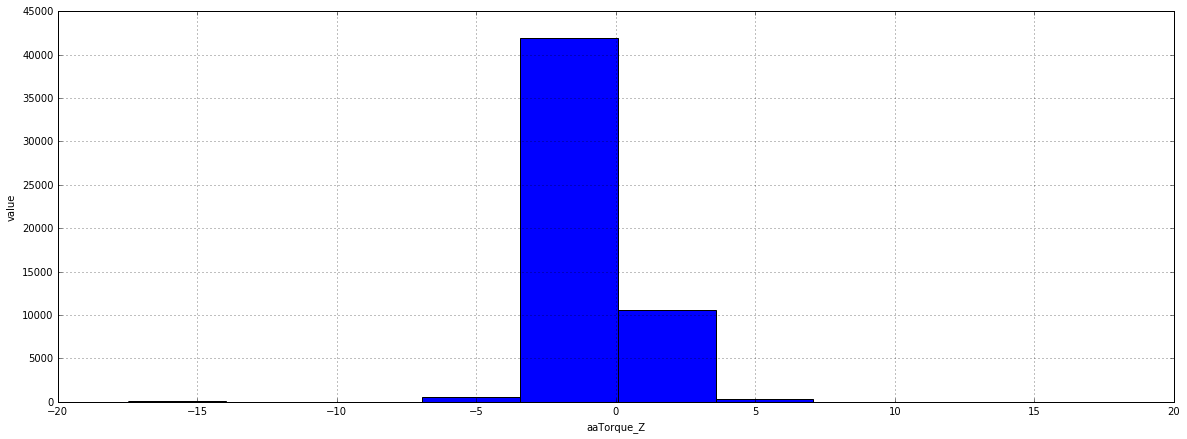

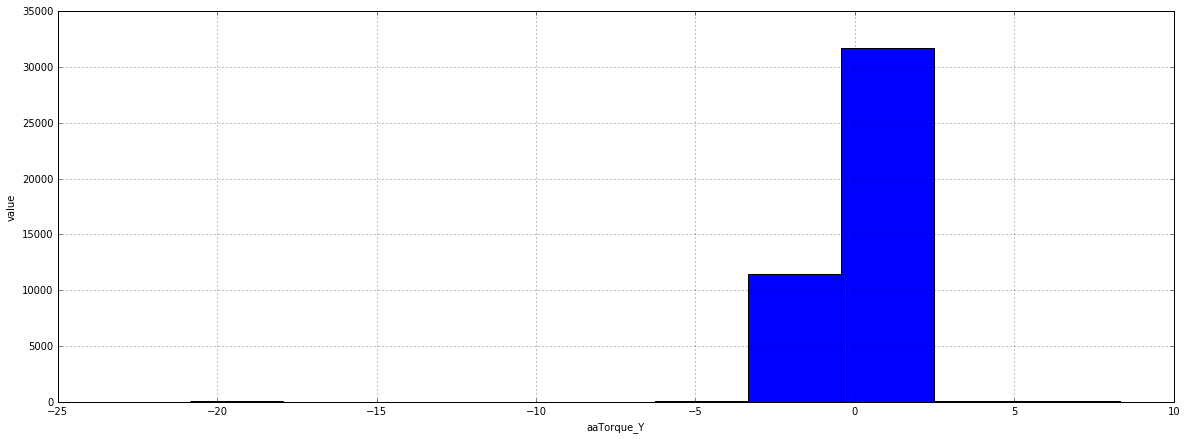

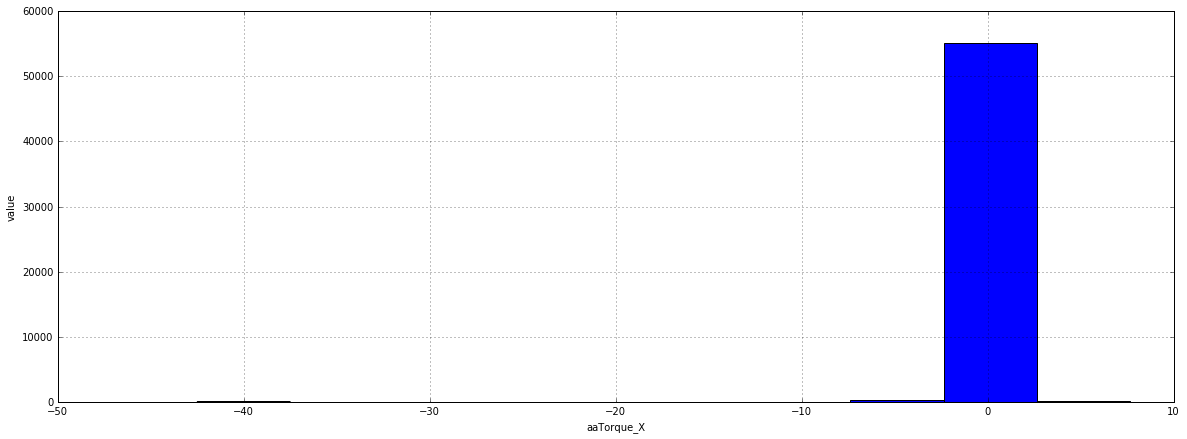

In [10]:
#plot histograms of each tag
for key in df_dict:
    frame = df_dict[key]
    frame['value'].hist(figsize=(20,7))
    plt.ylabel("value")
    plt.xlabel(key)
    plt.show()

In [11]:
df.head(20)[['sourcets','serverts','calvints','@timestamp']]

,sourcets,serverts,calvints,@timestamp
0,2017-04-07 00:58:24.297000,2017-04-07 00:58:24.333000,1491523200265,2017-04-07T00:00:00.816Z
1,2017-04-07 00:58:24.299000,2017-04-07 00:58:24.333000,1491523200265,2017-04-07T00:00:00.832Z
2,2017-04-07 00:58:24.302000,2017-04-07 00:58:24.333000,1491523200265,2017-04-07T00:00:00.832Z
3,2017-04-07 00:58:24.303000,2017-04-07 00:58:24.333000,1491523200265,2017-04-07T00:00:00.832Z
4,2017-04-07 00:58:24.304000,2017-04-07 00:58:24.333000,1491523200265,2017-04-07T00:00:00.832Z
5,2017-04-07 00:58:23.843000,2017-04-07 00:58:24.333000,1491523200265,2017-04-07T00:00:00.833Z
6,2017-04-07 00:58:24.290000,2017-04-07 00:58:24.333000,1491523200264,2017-04-07T00:00:00.833Z
7,2017-04-07 00:58:24.296000,2017-04-07 00:58:24.333000,1491523200265,2017-04-07T00:00:00.833Z
8,2017-04-07 00:58:23.702000,2017-04-07 00:58:24.333000,1491523200265,2017-04-07T00:00:00.833Z
9,2017-04-07 00:58:24.289000,2017-04-07 00:58:24.333000,1491523200264,2017-04-07T00:00:00.833Z


In [12]:
df.tail(20)[['sourcets','serverts','calvints','@timestamp']]

,sourcets,serverts,calvints,@timestamp
1017466,2017-04-08 00:58:20.267000,2017-04-08 00:58:20.958000,1491609597178,2017-04-07T23:59:57.744Z
1017467,2017-04-08 00:58:20.468000,2017-04-08 00:58:20.958000,1491609597178,2017-04-07T23:59:57.744Z
1017468,2017-04-08 00:58:20.467000,2017-04-08 00:58:20.958000,1491609597178,2017-04-07T23:59:57.744Z
1017469,2017-04-08 00:58:21.105000,2017-04-08 00:58:21.959000,1491609598182,2017-04-07T23:59:58.732Z
1017470,2017-04-08 00:58:21.739000,2017-04-08 00:58:21.958000,1491609598182,2017-04-07T23:59:58.787Z
1017471,2017-04-08 00:58:21.106000,2017-04-08 00:58:21.959000,1491609598182,2017-04-07T23:59:58.787Z
1017472,2017-04-08 00:58:21.835000,2017-04-08 00:58:21.959000,1491609598182,2017-04-07T23:59:58.788Z
1017473,2017-04-08 00:58:21.706000,2017-04-08 00:58:21.959000,1491609598182,2017-04-07T23:59:58.788Z
1017474,2017-04-08 00:58:21.938000,2017-04-08 00:58:21.958000,1491609598182,2017-04-07T23:59:58.788Z
1017475,2017-04-08 00:58:21.506000,2017-04-08 00:58:21.959000,1491609598182,2017-04-07T23:59:58.788Z
